In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [44]:
exptime = "2024-03-22-01:18:06-z2-63dee44dc42eb44231cd12a13c013f6d24e760f6"
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
directory_path = os.path.join(parent_dir, "results", exptime)
files = os.listdir(directory_path)
file_names = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]
print(len(file_names))

1008


In [45]:
rows = []
dicts = []
for file_name in file_names:
    d = {}
    parts = file_name.split("-")
    d["latency"] = latency = parts[0]
    d["mode"] = mode = parts[1]
    d["site"] = site = parts[2]
    d["workload"] = workload = parts[3]
    d["conc"] = conc = int(parts[4][parts[4].find("_")+1:])
    d["finish_countdown"] = finish_countdown = parts[5]
    d["fastpath_timeout"] = fastpath_timeout = parts[6]
    d["wait_commit_timeout"] = wait_commit_timeout = parts[7]
    d["instance_commit_timeout"] = instance_commit_timeout = parts[8]
    d["fastpath_rate"] = fastpash_mode = "adaptive" if parts[9] == "101" else parts[9]
    d["duration"] = duration = parts[10][:parts[10].find(".")]
    
    if "plus" not in mode:
        finish_countdown = None
        fastpath_timeout = None
        wait_commit_timeout = None
        instance_commit_timeout = None

    d["throughput"] = throughtput = None
    d["mid_throughput"] = mid_throughtput = None

    d["fastpath_count"] = fastpath_count = 0
    d["fastpath_50pct"] = fastpath_50pct = None
    d["fastpath_ave"] = fastpath_ave = None
    d["fast_original_count"] = fast_original_count = 0
    d["fast_original_50pct"] = fast_original_50pct = None
    d["original_protocol_count"] = original_protocol_count = 0
    d["original_protocol_50pct"] = original_protocol_50pct = None
    d["original_protocol_ave"] = original_protocol_ave = None

    d["latency50pct"] = latency50pct = None
    d["latency90pct"] = latency90pct = None
    d["latency99pct"] = latency99pct = None
    d["latency_ave"] = latency_ave = None

    d["cpu0_medium"] = cpu0_medium = None
    d["cpu1_medium"] = cpu1_medium = None
    d["cpu2_medium"] = cpu2_medium = None
    d["clientall_medium"] = clientall_medium = None

    d["fastpath_attempted"] = 0
    d["fastpath_successed"] = 0
    
    with open(os.path.join(directory_path, file_name), "r") as file:
        for line in file:
            if "Total throughtput is" in line:
                d["throughput"] = throughtput = float(line[line.find("is")+3:].strip())
            if "Mid throughput is" in line:
                d["mid_throughput"] = mid_throughtput = float(line[line.find("is")+3:].strip())
            if "Fastpath count" in line:
                d["fastpath_count"] = fastpath_count = int(line[line.find("count")+6:line.find("50pct")])
                d["fastpath_50pct"] = fastpath_50pct = float(line[line.find("50pct")+6:line.find("90pct")]) if fastpath_count > 0 else None
                d["fastpath_ave"] = fastpath_ave = float(line[line.find("ave")+4:]) if fastpath_count > 0 else None
            # if "Fast-Original" in line:
            #     d["fast_original_count"] = fast_original_count = int(line[line.find("count")+6:line.find("50pct")])
            #     d["fast_original_50pct"] = fast_original_50pct = float(line[line.find("50pct")+6:line.find("90pct")]) if fast_original_count > 0 else None
            if "Original-Protocol" in line:
                d["original_protocol_count"] = original_protocol_count = int(line[line.find("count")+6:line.find("50pct")])
                d["original_protocol_50pct"] = original_protocol_50pct = float(line[line.find("50pct")+6:line.find("90pct")]) if original_protocol_count > 0 else None
                d["original_protocol_ave"] = original_protocol_ave = float(line[line.find("ave")+4:]) if original_protocol_count > 0 else None
            if "Latency-50pct is" in line:
                d["latency50pct"] = latency50pct = float(line[line.find("Latency-50pct is")+17:line.find("Latency-90pct is")-4])
                d["latency90pct"] = latency90pct = float(line[line.find("Latency-90pct is")+17:line.find("Latency-99pct is")-4])
                d["latency99pct"] = latency99pct = float(line[line.find("Latency-99pct is")+17:line.find("ave is")-4])
                d["latency_ave"] = latency_ave = float(line[line.find("ave is")+7:-3])
            if "Fastpath statistics" in line:
                d["fastpath_attempted"] = fastpath_attempted = int(line[line.find("attempted")+10:line.find("successed")])
                d["fastpath_successed"] = fastpath_successed = int(line[line.find("successed")+10:line.find("rate(pct)")])
            if "cpu0" in line:
                d["cpu0_medium"] = cpu0_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "cpu1" in line:
                d["cpu1_medium"] = cpu1_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "cpu2" in line:
                d["cpu2_medium"] = cpu2_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "clientall" in line:
                d["clientall_medium"] = clientall_medium = float(line[line.find("medium")+8:line.find("mean")])
    # print(mode, site, workload, conc, throughtput, latency50pct, latency90pct, latency99pct, fastpath_count, coordinatoraccept_count, original_count, max_gap)
    
    d["total_count"] = total_count = fastpath_count + original_protocol_count
    d["fastpath_success_pct"] = fastpath_success_pct = d["fastpath_successed"] * 100.0 / d["fastpath_attempted"] if d["fastpath_attempted"] > 0 else 0
    d["cpu_max"] = max(d["cpu0_medium"], d["cpu1_medium"], d["cpu2_medium"])
    d["cpu_ave"] = (d["cpu0_medium"] + d["cpu1_medium"] + d["cpu2_medium"]) / 3
    
    rows.append([latency, site, mode, workload, fastpash_mode, duration, conc, finish_countdown, fastpath_timeout, wait_commit_timeout, \
                 instance_commit_timeout, throughtput, mid_throughtput, fastpath_count, fastpath_50pct, fastpath_ave, fastpath_success_pct, \
                 original_protocol_count, original_protocol_50pct, original_protocol_ave, total_count, \
                 latency50pct, latency90pct, latency99pct, latency_ave, cpu0_medium, cpu1_medium, cpu2_medium, clientall_medium])

    # if duration != "120":
    #     continue
    
    dicts.append(d)

print(len(rows))
print(len(dicts))

1008
1008


In [46]:
fields = ["latency", "site", "mode", "workload", "fastpath_mode", "duration", "conc", "finish_countdown", "fastpath_timeout", "wait_commit_timeout", \
          "instance_commit_timeout", "throughtput", "mid_throughput", "fastpath_count", "fastpath_50pct", "fastpath_ave", "fastpath_success_pct", \
          "original_protocol_count", "original_protocol_50pct", "original_protocol_ave", "total_count", \
          "latency50pct", "latency90pct", "latency99pct", "latency_ave", "cpu0_medium", "cpu1_medium", "cpu2_medium", "clientall_medium"]

import csv 

filename = os.path.join("curp_results-" + exptime + ".csv")

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

In [55]:
workloads = ["rw_1000000", "rw_zipf_0", "rw_zipf_0.2", "rw_zipf_0.4", "rw_zipf_0.6", "rw_zipf_0.8", "rw_zipf_1"]
pcts = ["0", "25", "50", "75", "100", "adaptive"]

def get_vanilla_data(mode, workload, pcts):
    vanilla_data = sorted([e for e in dicts if e["workload"] == fixed_workload and e["mode"] == mode], key=lambda x: x["conc"])
    print(len(vanilla_data))
    return vanilla_data

def get_jetpack_data(mode, workload, pcts):
    pct_data = {}
    for pct in pcts:
        pct_data[pct] = sorted([e for e in dicts if e["workload"] == workload and e["mode"] == mode \
                                and e["fastpath_rate"] == pct], key=lambda x: x["conc"])
    print([len(pct_data[pct]) for pct in pcts])
    return pct_data

print("get vanilla data")
raft_vanilla = get_vanilla_data("none_fpga_raft", "rw_1000000", pcts)
copilot_vanilla = get_vanilla_data("none_copilot", "rw_1000000", pcts)
mencius_vanilla = get_vanilla_data("none_mencius", "rw_1000000", pcts)
mongodb_vanilla = get_vanilla_data("none_mongodb", "rw_1000000", pcts)

raft_jetpack = {}
copilot_jetpack = {}
mencius_jetpack = {}
mongodb_jetpack = {}

for workload in workloads:
    print("get " + workload + " data")
    raft_jetpack[workload] = get_jetpack_data("rule_fpga_raft", workload, pcts)
    copilot_jetpack[workload] = get_jetpack_data("rule_copilot", workload, pcts)
    mencius_jetpack[workload] = get_jetpack_data("rule_mencius", workload, pcts)
    mongodb_jetpack[workload] = get_jetpack_data("rule_mongodb", workload, pcts)

conc = [e["conc"] for e in mencius_vanilla]
conc_2_id = {}
for (i, c) in enumerate(conc):
    conc_2_id[c] = i
print(conc)
print(conc_2_id)

pct_modes = ["0", "25", "50", "75", "100", "adaptive"]
print(pct_modes)

get vanilla data
0
0
14
14
get rw_1000000 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
get rw_zipf_0 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
get rw_zipf_0.2 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
get rw_zipf_0.4 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
get rw_zipf_0.6 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
get rw_zipf_0.8 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
get rw_zipf_1 data
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[14, 14, 14, 14, 14, 0]
[14, 14, 14, 14, 14, 0]
[1, 3, 6, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]
{1: 0, 3: 1, 6: 2, 10: 3, 20: 4, 40: 5, 60: 6, 80: 7, 100: 8, 120: 9, 150: 10, 200: 11, 250: 12, 300: 13}
['0', '25', '50', '75', '100', 'adaptive']


In [56]:
# # filter a specific conc number when x-axis is not number of clients
# fixed_fastpath_rate = "100"

# zipf_modes = ["rw_zipf_0", "rw_zipf_0.2", "rw_zipf_0.4", "rw_zipf_0.6", "rw_zipf_0.8", "rw_zipf_1"]

# def get_workload_data(mode, workloads):
#     workload_data = {}
#     for workload in workloads:
#         workload_data[workload] = sorted([e for e in dicts if e["workload"] == workload and e["mode"] == mode \
#                                           and e["fastpath_rate"] == fixed_fastpath_rate], key=lambda x: x["conc"])
#     print([len(workload_data[workload]) for workload in workloads])
#     return workload_data

# raft_zipf = get_workload_data("rule_fpga_raft", zipf_modes)
# copilot_zipf = get_workload_data("rule_copilot", zipf_modes)
# mencius_zipf = get_workload_data("rule_mencius", zipf_modes)
# mongodb_zipf = get_workload_data("rule_mongodb", zipf_modes)

In [57]:
# filter a specific conc number when x-axis is not number of clients
fixed_conc_number = 10

In [83]:
def draw_throughput(axes, data, data_vanilla, modes, l_info, title, ratio = False):
    assert len(modes) == len(l_info)
    if (len(data_vanilla)) == 0:
        return
    
    client = [12 * c for c in conc]
    
    l_vanilla = [0 for _ in conc]
    l = [[0 for _ in conc] for __ in range(len(modes))]
    
    for e in data_vanilla:
        l_vanilla[conc_2_id[e["conc"]]] = e["mid_throughput"]
    for i, mode in enumerate(modes):
        for e in data[mode]:
            l[i][conc_2_id[e["conc"]]] = e["mid_throughput"] if e["mid_throughput"] != None else 0

    if ratio:
        for i in range(len(modes)):
            for j in range(len(conc)):
                l[i][j] /= l_vanilla[j]
        for j in range(len(conc)):
            l_vanilla[j] /= l_vanilla[j]
    
    axes.plot(client, l_vanilla, label='vanilla', color='green', marker='D')
    for i in range(len(modes)):
        if l[i][0] != 0:
            axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2])

    axes.set_title(title)
    axes.set_xlabel('Number of Client')
    axes.set_ylabel('Throughput (vanilla is 1)' if ratio else 'Throughput (req/s)')
    if ratio:
        axes.set_ylim(0.8, 2.0)
    axes.legend()

    if ratio:
        min_ratios = [5.0 for _ in range(len(modes))]
        for i in range(len(modes)):
            for j in range(len(conc)):
                min_ratios[i] = min(l[i][j], min_ratios[i])
        return min_ratios

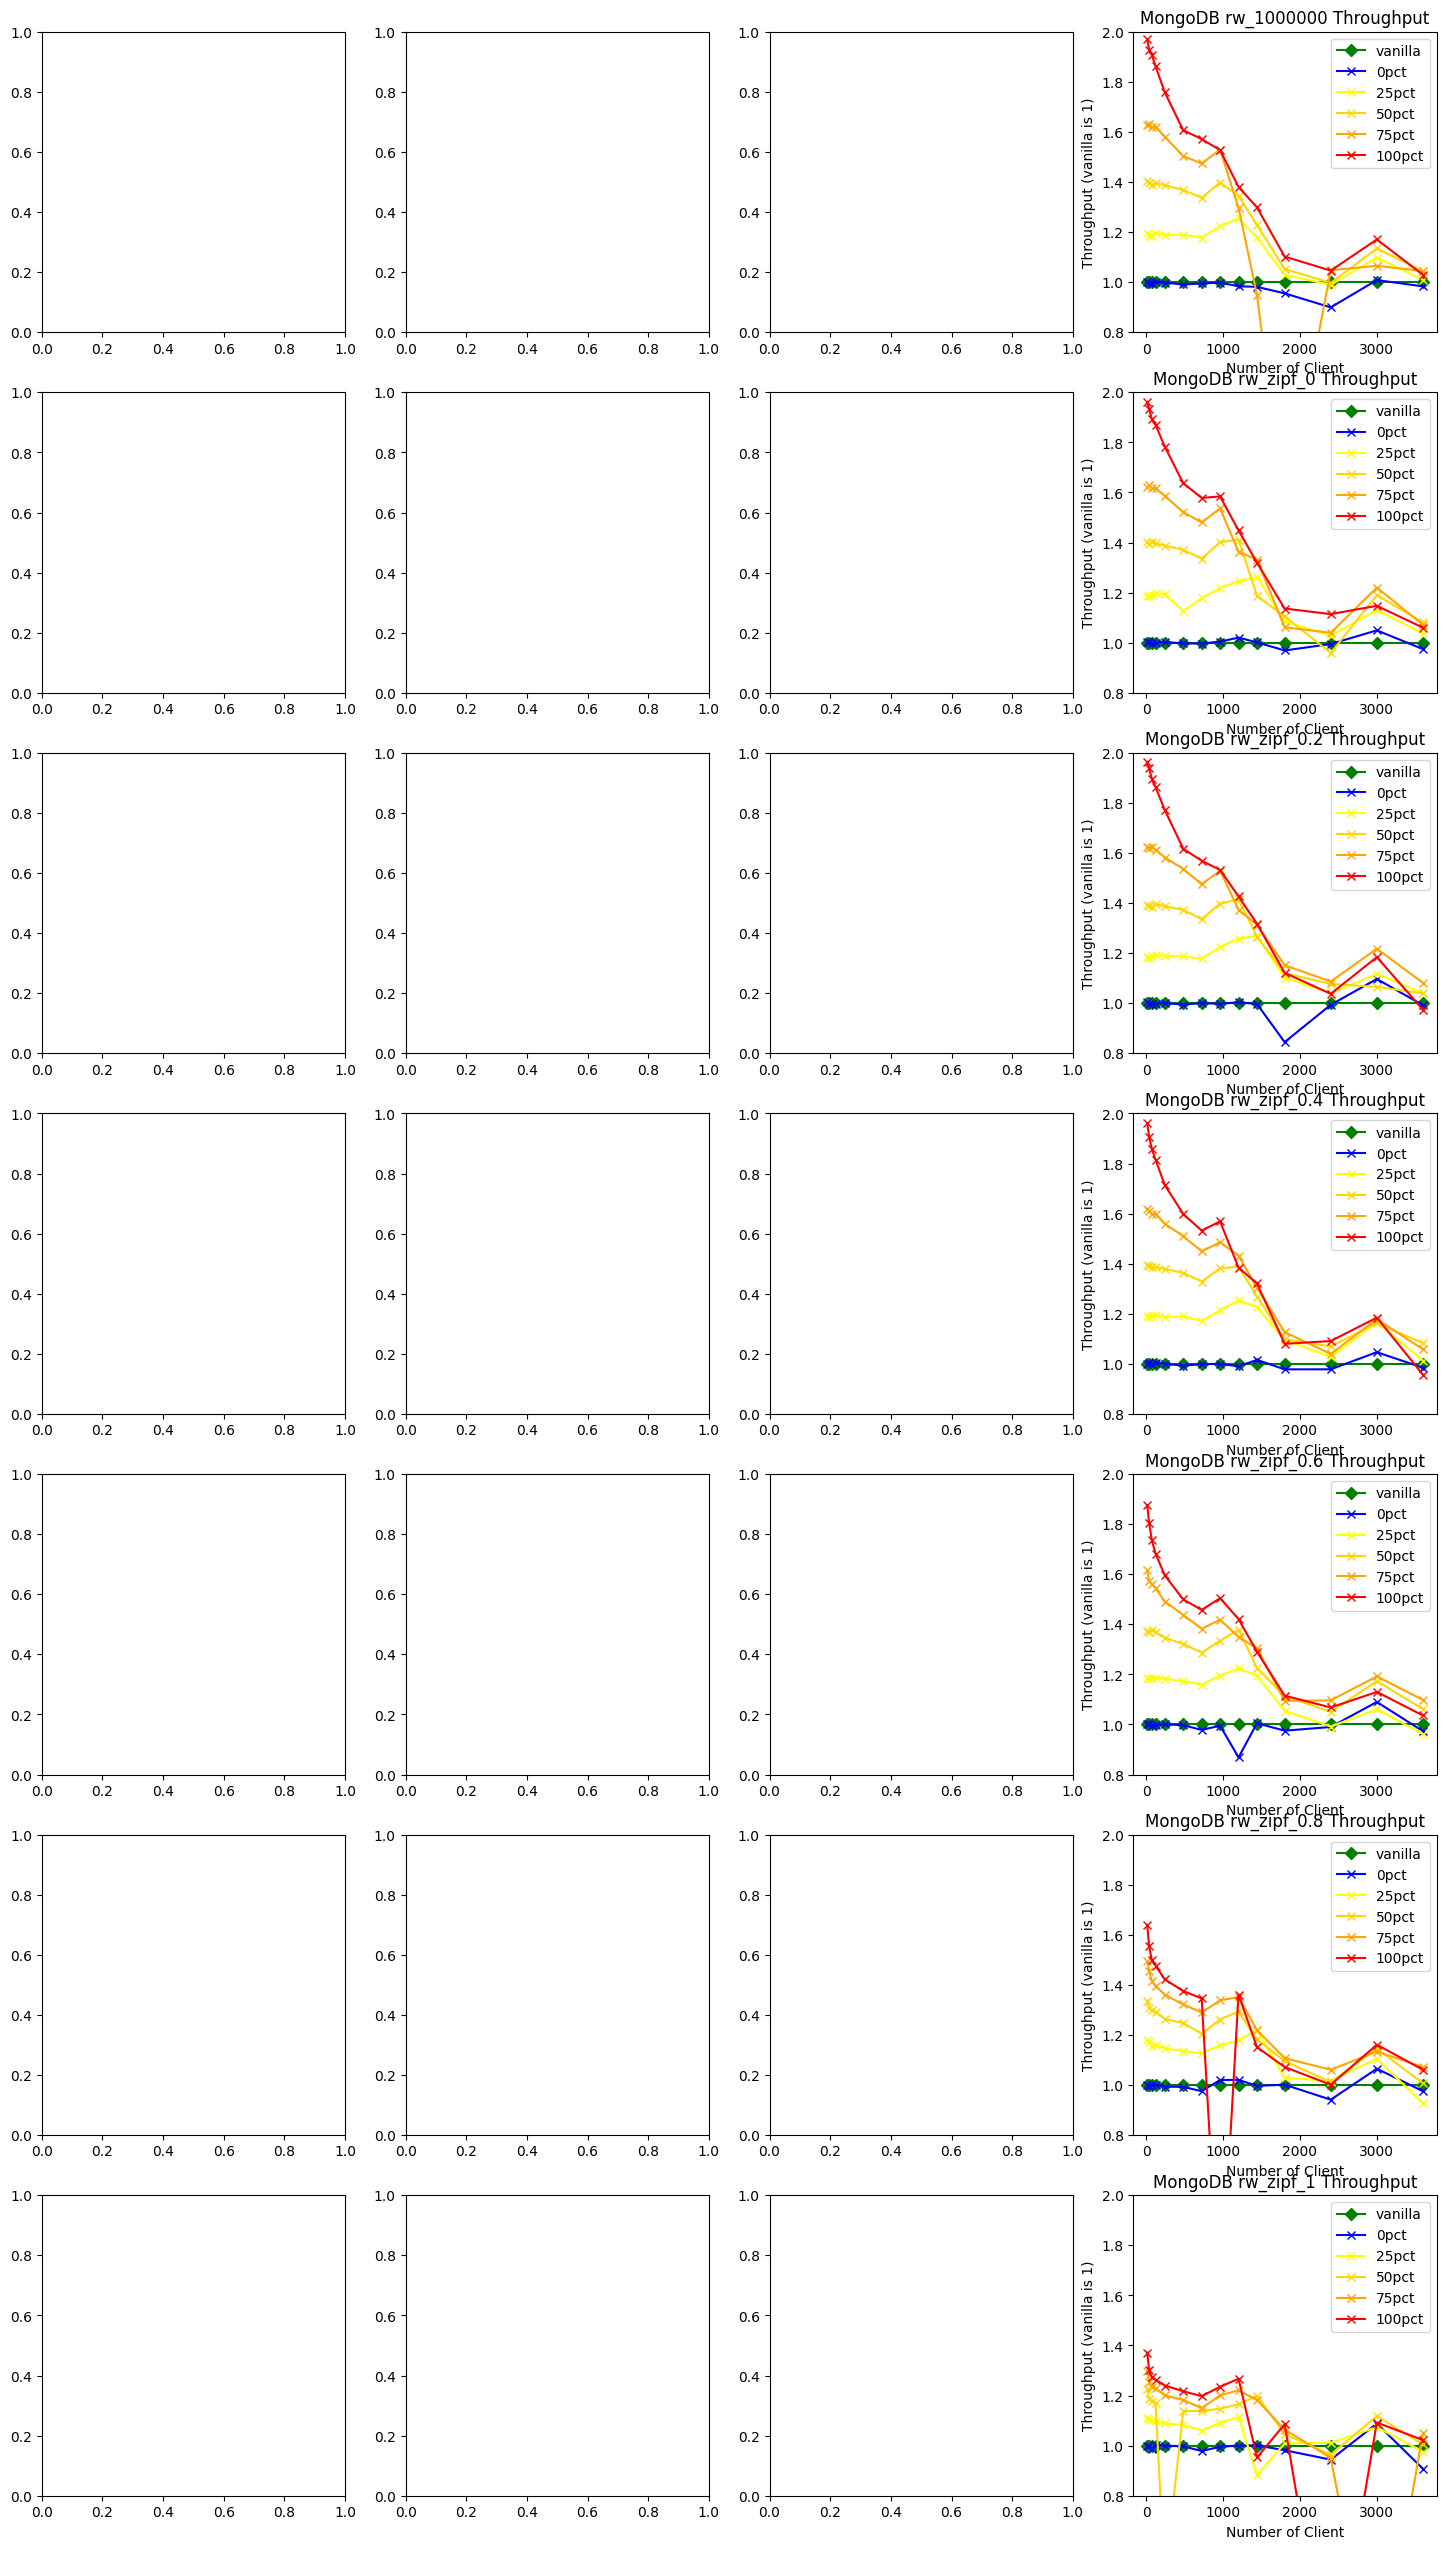

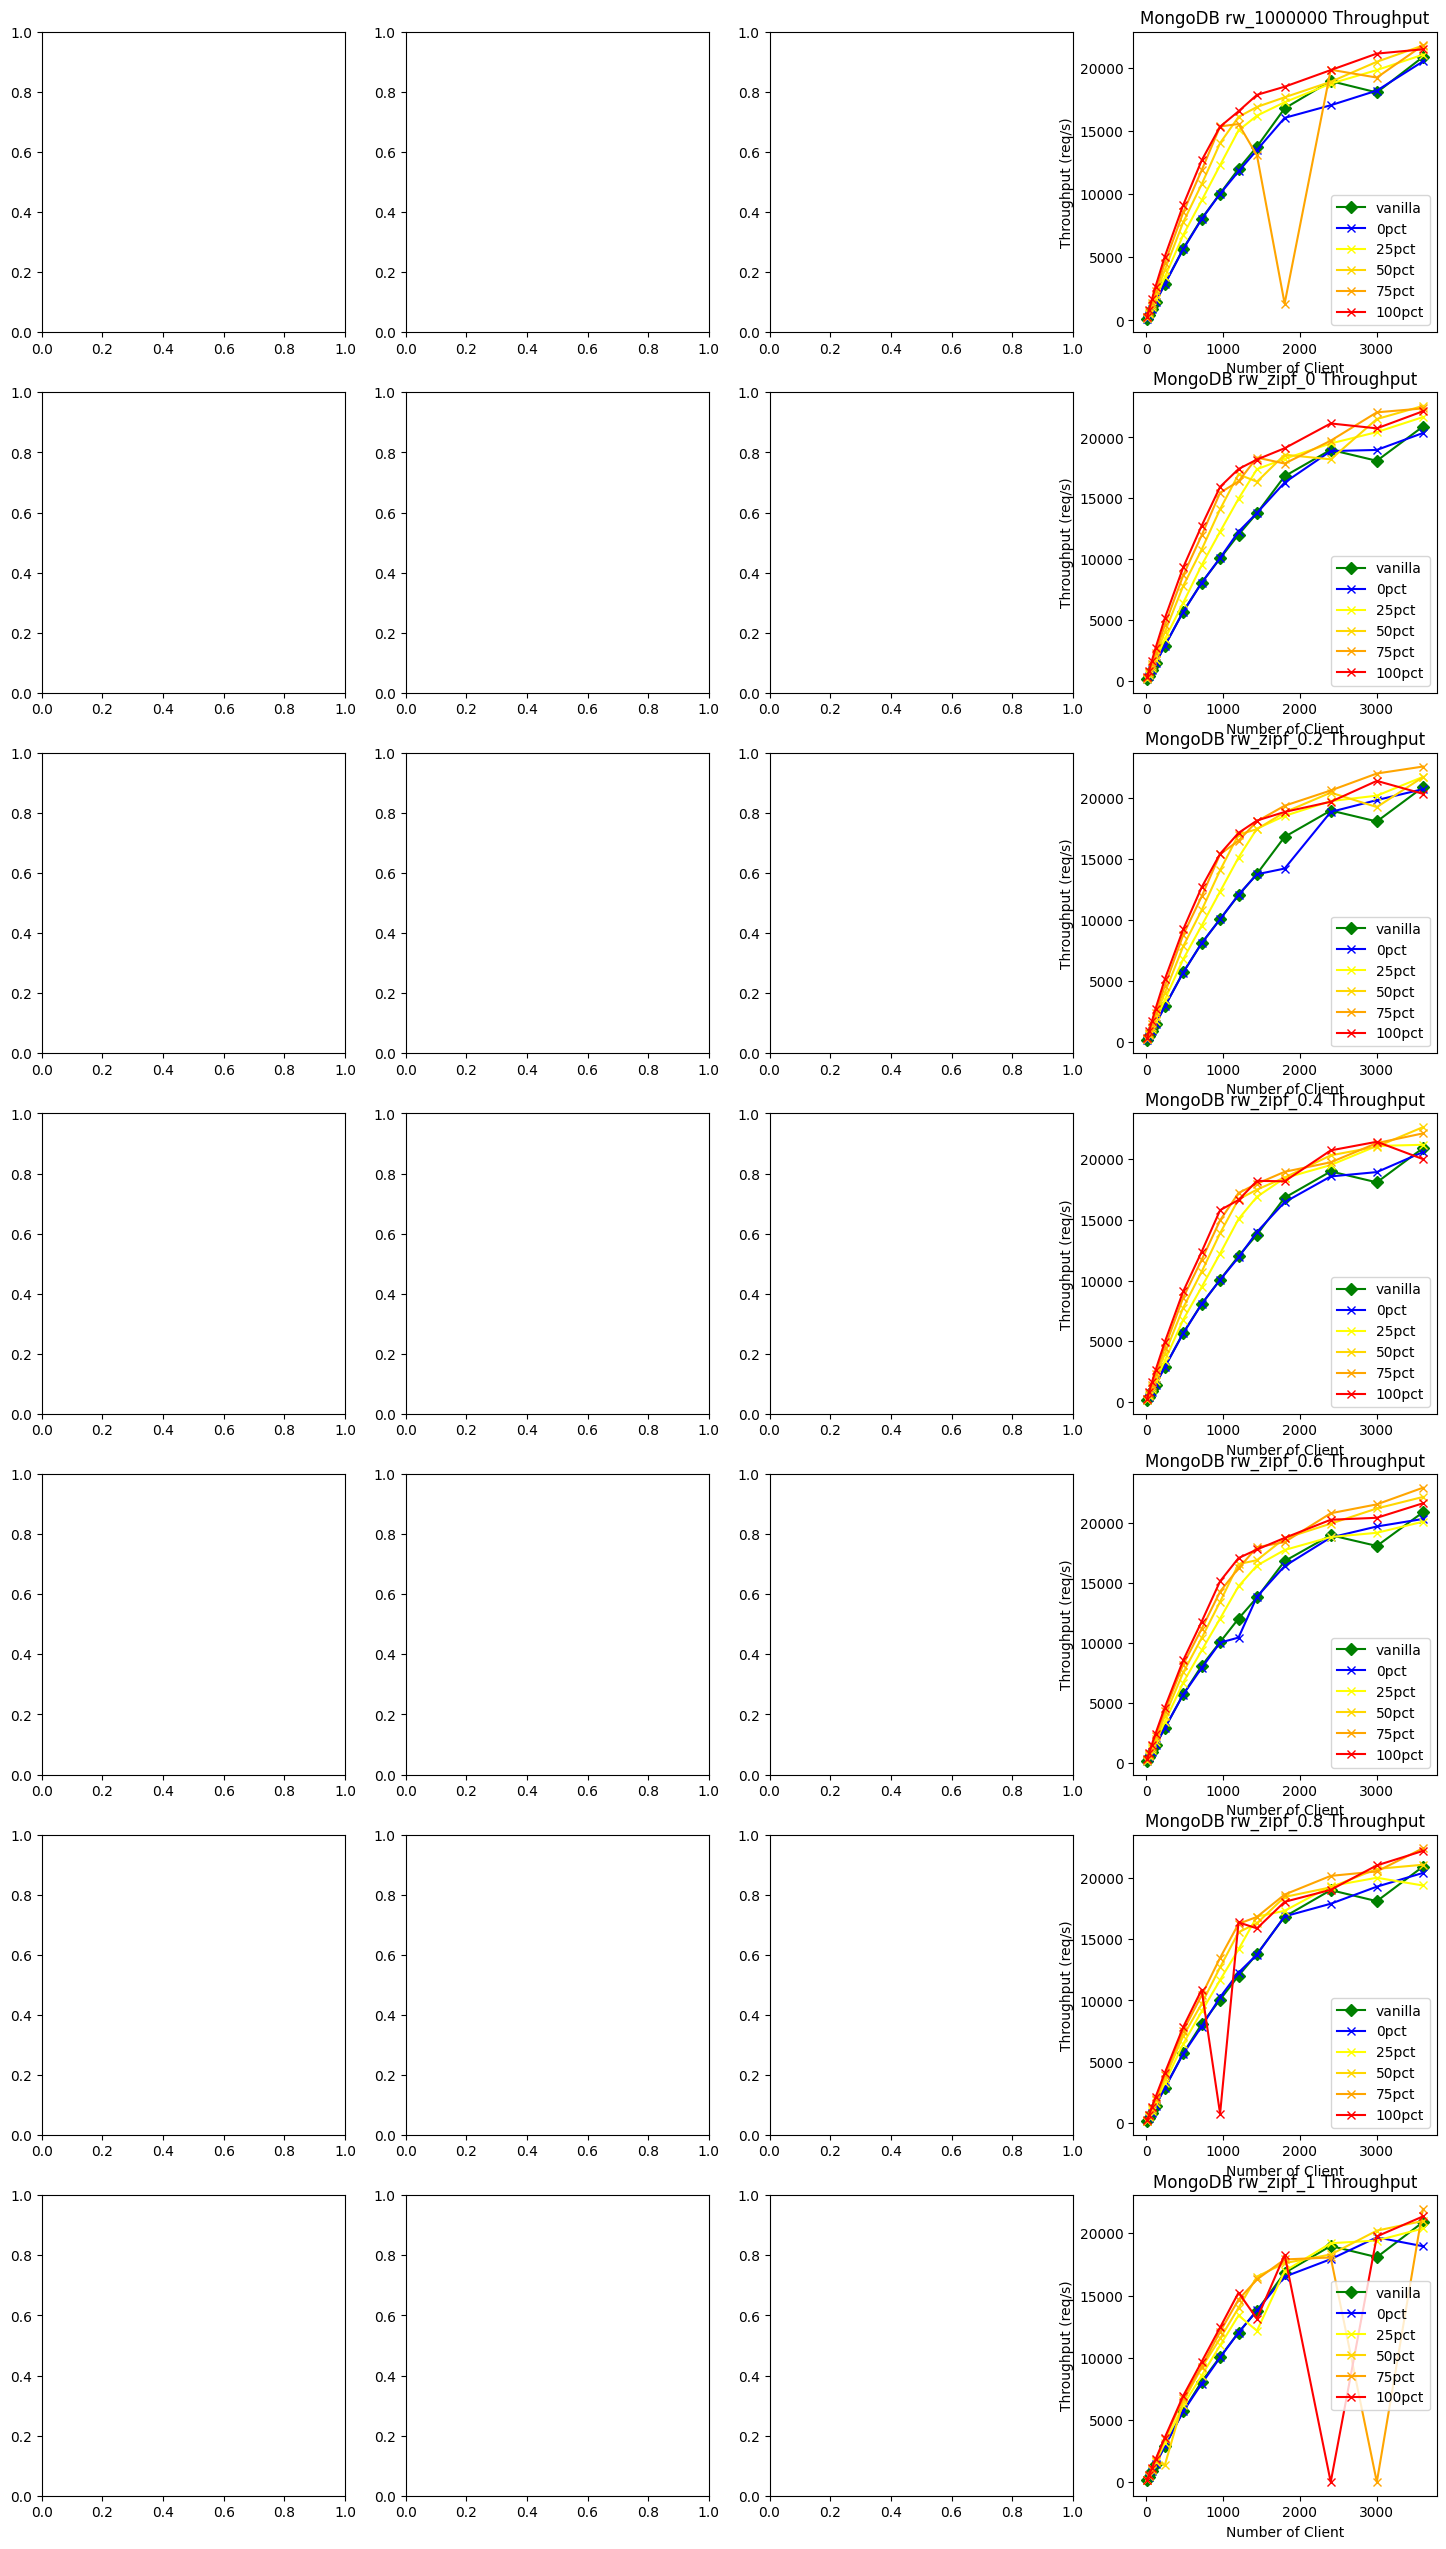

In [84]:
# Different fastpath percentages

pct_line_infos = [
    ["0pct", "blue", "x"],
    ["25pct", "yellow", "x"],
    ["50pct", "gold", "x"],
    ["75pct", "orange", "x"],
    ["100pct", "red", "x"],
    ["adaptive", "black", "x"],
]



fig_throughput_pct_ratio, axes_throughput_pct_ratio = plt.subplots(nrows=len(workloads), ncols=4, figsize=(18, 32))

for i, workload in enumerate(workloads):
    # draw_throughput(axes_throughput_pct_ratio[i][0], raft_jetpack[workload], raft_vanilla, pct_modes, pct_line_infos, 'Raft ' + workload + ' Throughput', True)
    # draw_throughput(axes_throughput_pct_ratio[i][1], copilot_jetpack[workload], copilot_vanilla, pct_modes, pct_line_infos, 'Copilot ' + workload + ' Throughput', True)
    # draw_throughput(axes_throughput_pct_ratio[i][2], mencius_jetpack[workload], mencius_vanilla, pct_modes, pct_line_infos, 'Mencius ' + workload + ' Throughput', True)
    draw_throughput(axes_throughput_pct_ratio[i][3], mongodb_jetpack[workload], mongodb_vanilla, pct_modes, pct_line_infos, 'MongoDB ' + workload + ' Throughput', True)

# print(pct_modes)
# print("Raft Min Ratios:", min_ratios_raft)
# print("Copilot Min Ratios:", min_ratios_copilot)
# print("Mencius Min Ratios:", min_ratios_mencius)

fig_throughput_pct_ratio.savefig("throughput_pct_ratio.pdf", bbox_inches="tight")
fig_throughput_pct_ratio.show()



fig_throughput_pct, axes_throughput_pct = plt.subplots(nrows=len(workloads), ncols=4, figsize=(18, 32))

for i, workload in enumerate(workloads):
    # draw_throughput(axes_throughput_pct[i][0], raft_jetpack[workload], raft_vanilla, pct_modes, pct_line_infos, 'Raft ' + workload + ' Throughput')
    # draw_throughput(axes_throughput_pct[i][1], copilot_jetpack[workload], copilot_vanilla, pct_modes, pct_line_infos, 'Copilot ' + workload + ' Throughput')
    # draw_throughput(axes_throughput_pct[i][2], mencius_jetpack[workload], mencius_vanilla, pct_modes, pct_line_infos, 'Mencius ' + workload + ' Throughput')
    draw_throughput(axes_throughput_pct[i][3], mongodb_jetpack[workload], mongodb_vanilla, pct_modes, pct_line_infos, 'MongoDB ' + workload + ' Throughput')

fig_throughput_pct.savefig("throughput_pct.pdf", bbox_inches="tight")
fig_throughput_pct.show()

Different zipf alphas
['0', '5', '50', '100', 'adaptive']
Raft Min Ratios: [0.7644183279017492, 0.7766880041067442, 0.7846187649341426, 0.8368142065139346, 0.9340092361173779, 0.9260008244600176]
Copilot Min Ratios: [1.0067693734325276, 1.0108916942401316, 1.0201563784273642, 1.0280427406267783, 1.0407848426731858, 1.040949229699256]
Mencius Min Ratios: [0.3001598384790107, 0.3655154369440084, 0.28645789517960796, 0.24236560948935812, 0.0, 0.0]


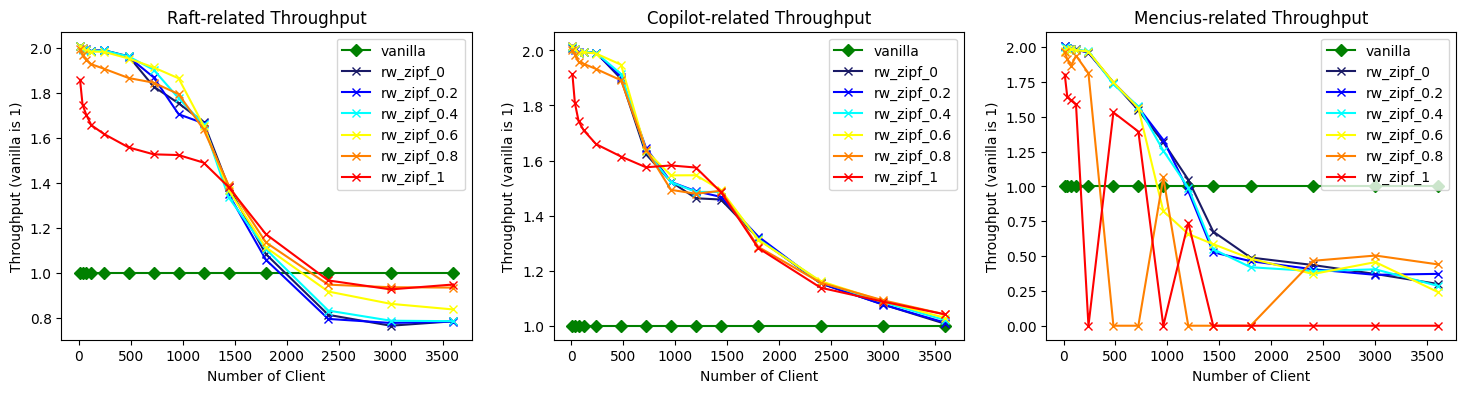

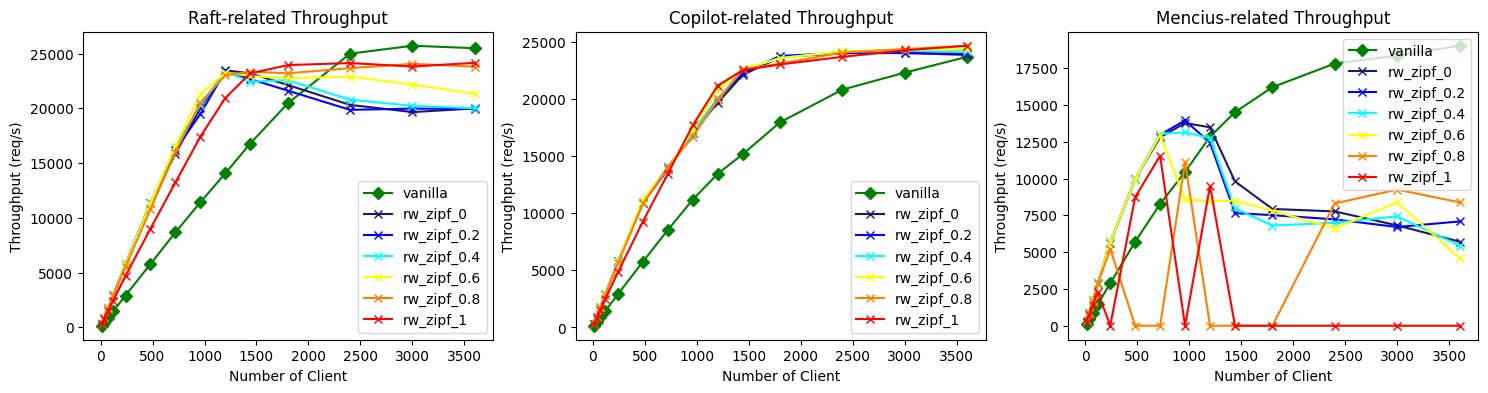

In [40]:
# Different zipf alphas

print("Different zipf alphas")

zipf_line_infos = [
    [zipf_modes[0], (0.1, 0.1, 0.4), "x"],
    [zipf_modes[1], (0.0, 0.0, 1.0), "x"],
    [zipf_modes[2], (0.0, 1.0, 1.0), "x"],
    [zipf_modes[3], (1.0, 1.0, 0.0), "x"],
    [zipf_modes[4], (1.0, 0.5, 0.0), "x"],
    [zipf_modes[5], (1.0, 0.0, 0.0), "x"],
]

fig_throughput_zipf_ratio, axes_throughput_zipf_ratio = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

min_ratios_raft    = draw_throughput(axes_throughput_zipf_ratio[0], raft_zipf, raft_vanilla, zipf_modes, zipf_line_infos, 'Raft-related Throughput', True)
min_ratios_copilot = draw_throughput(axes_throughput_zipf_ratio[1], copilot_zipf, copilot_vanilla, zipf_modes, zipf_line_infos, 'Copilot-related Throughput', True)
min_ratios_mencius = draw_throughput(axes_throughput_zipf_ratio[2], mencius_zipf, mencius_vanilla, zipf_modes, zipf_line_infos, 'Mencius-related Throughput', True)

print(pct_modes)
print("Raft Min Ratios:", min_ratios_raft)
print("Copilot Min Ratios:", min_ratios_copilot)
print("Mencius Min Ratios:", min_ratios_mencius)

fig_throughput_zipf_ratio.savefig("throughput_zipf_ratio.pdf", bbox_inches="tight")
fig_throughput_zipf_ratio.show()


fig_throughput_zipf, axes_throughput_zipf = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

draw_throughput(axes_throughput_zipf[0], raft_zipf, raft_vanilla, zipf_modes, zipf_line_infos, 'Raft-related Throughput')
draw_throughput(axes_throughput_zipf[1], copilot_zipf, copilot_vanilla, zipf_modes, zipf_line_infos, 'Copilot-related Throughput')
draw_throughput(axes_throughput_zipf[2], mencius_zipf, mencius_vanilla, zipf_modes, zipf_line_infos, 'Mencius-related Throughput')

fig_throughput_zipf.savefig("throughput_zipf.pdf", bbox_inches="tight")
fig_throughput_zipf.show()

[[0, 0, 21.36, 22.02, 41.01, 42.24, 0], [83.09, 82.98, 82.63, 82.68, 82.77, 0, 0], [83.09, 82.98, 82.32, 81.34, 43.83, 42.24, 0]]
[[0, 0, 21.33, 22.06, 40.99, 42.09, 0], [83.09, 83.06, 82.61, 82.69, 82.78, 0, 0], [83.09, 83.06, 82.32, 81.25, 44.15, 42.09, 0]]
[[0, 0, 21.29, 22.0, 40.97, 42.19, 0], [83.09, 83.12, 82.65, 82.66, 82.78, 0, 0], [83.09, 83.12, 82.36, 81.24, 44.27, 42.19, 0]]
[[0, 0, 21.35, 22.07, 41.03, 42.45, 0], [83.09, 82.73, 82.58, 82.81, 82.85, 0, 0], [83.09, 82.73, 82.3, 81.66, 46.17, 42.45, 0]]
[[0, 0, 21.41, 22.24, 41.28, 42.96, 0], [83.09, 83.21, 82.7, 82.87, 82.74, 0, 0], [83.09, 83.21, 82.42, 81.91, 60.49, 42.96, 0]]
[[0, 0, 21.55, 40.62, 60.26, 61.01, 0], [83.09, 82.77, 82.71, 82.69, 82.72, 0, 0], [83.09, 82.77, 82.5, 82.11, 63.1, 61.01, 0]]
[[0, 0, 81.31, 81.93, 82.23, 82.37, 0], [83.09, 82.68, 82.78, 82.68, 82.87, 0, 0], [83.09, 82.68, 82.67, 82.45, 82.49, 82.37, 0]]


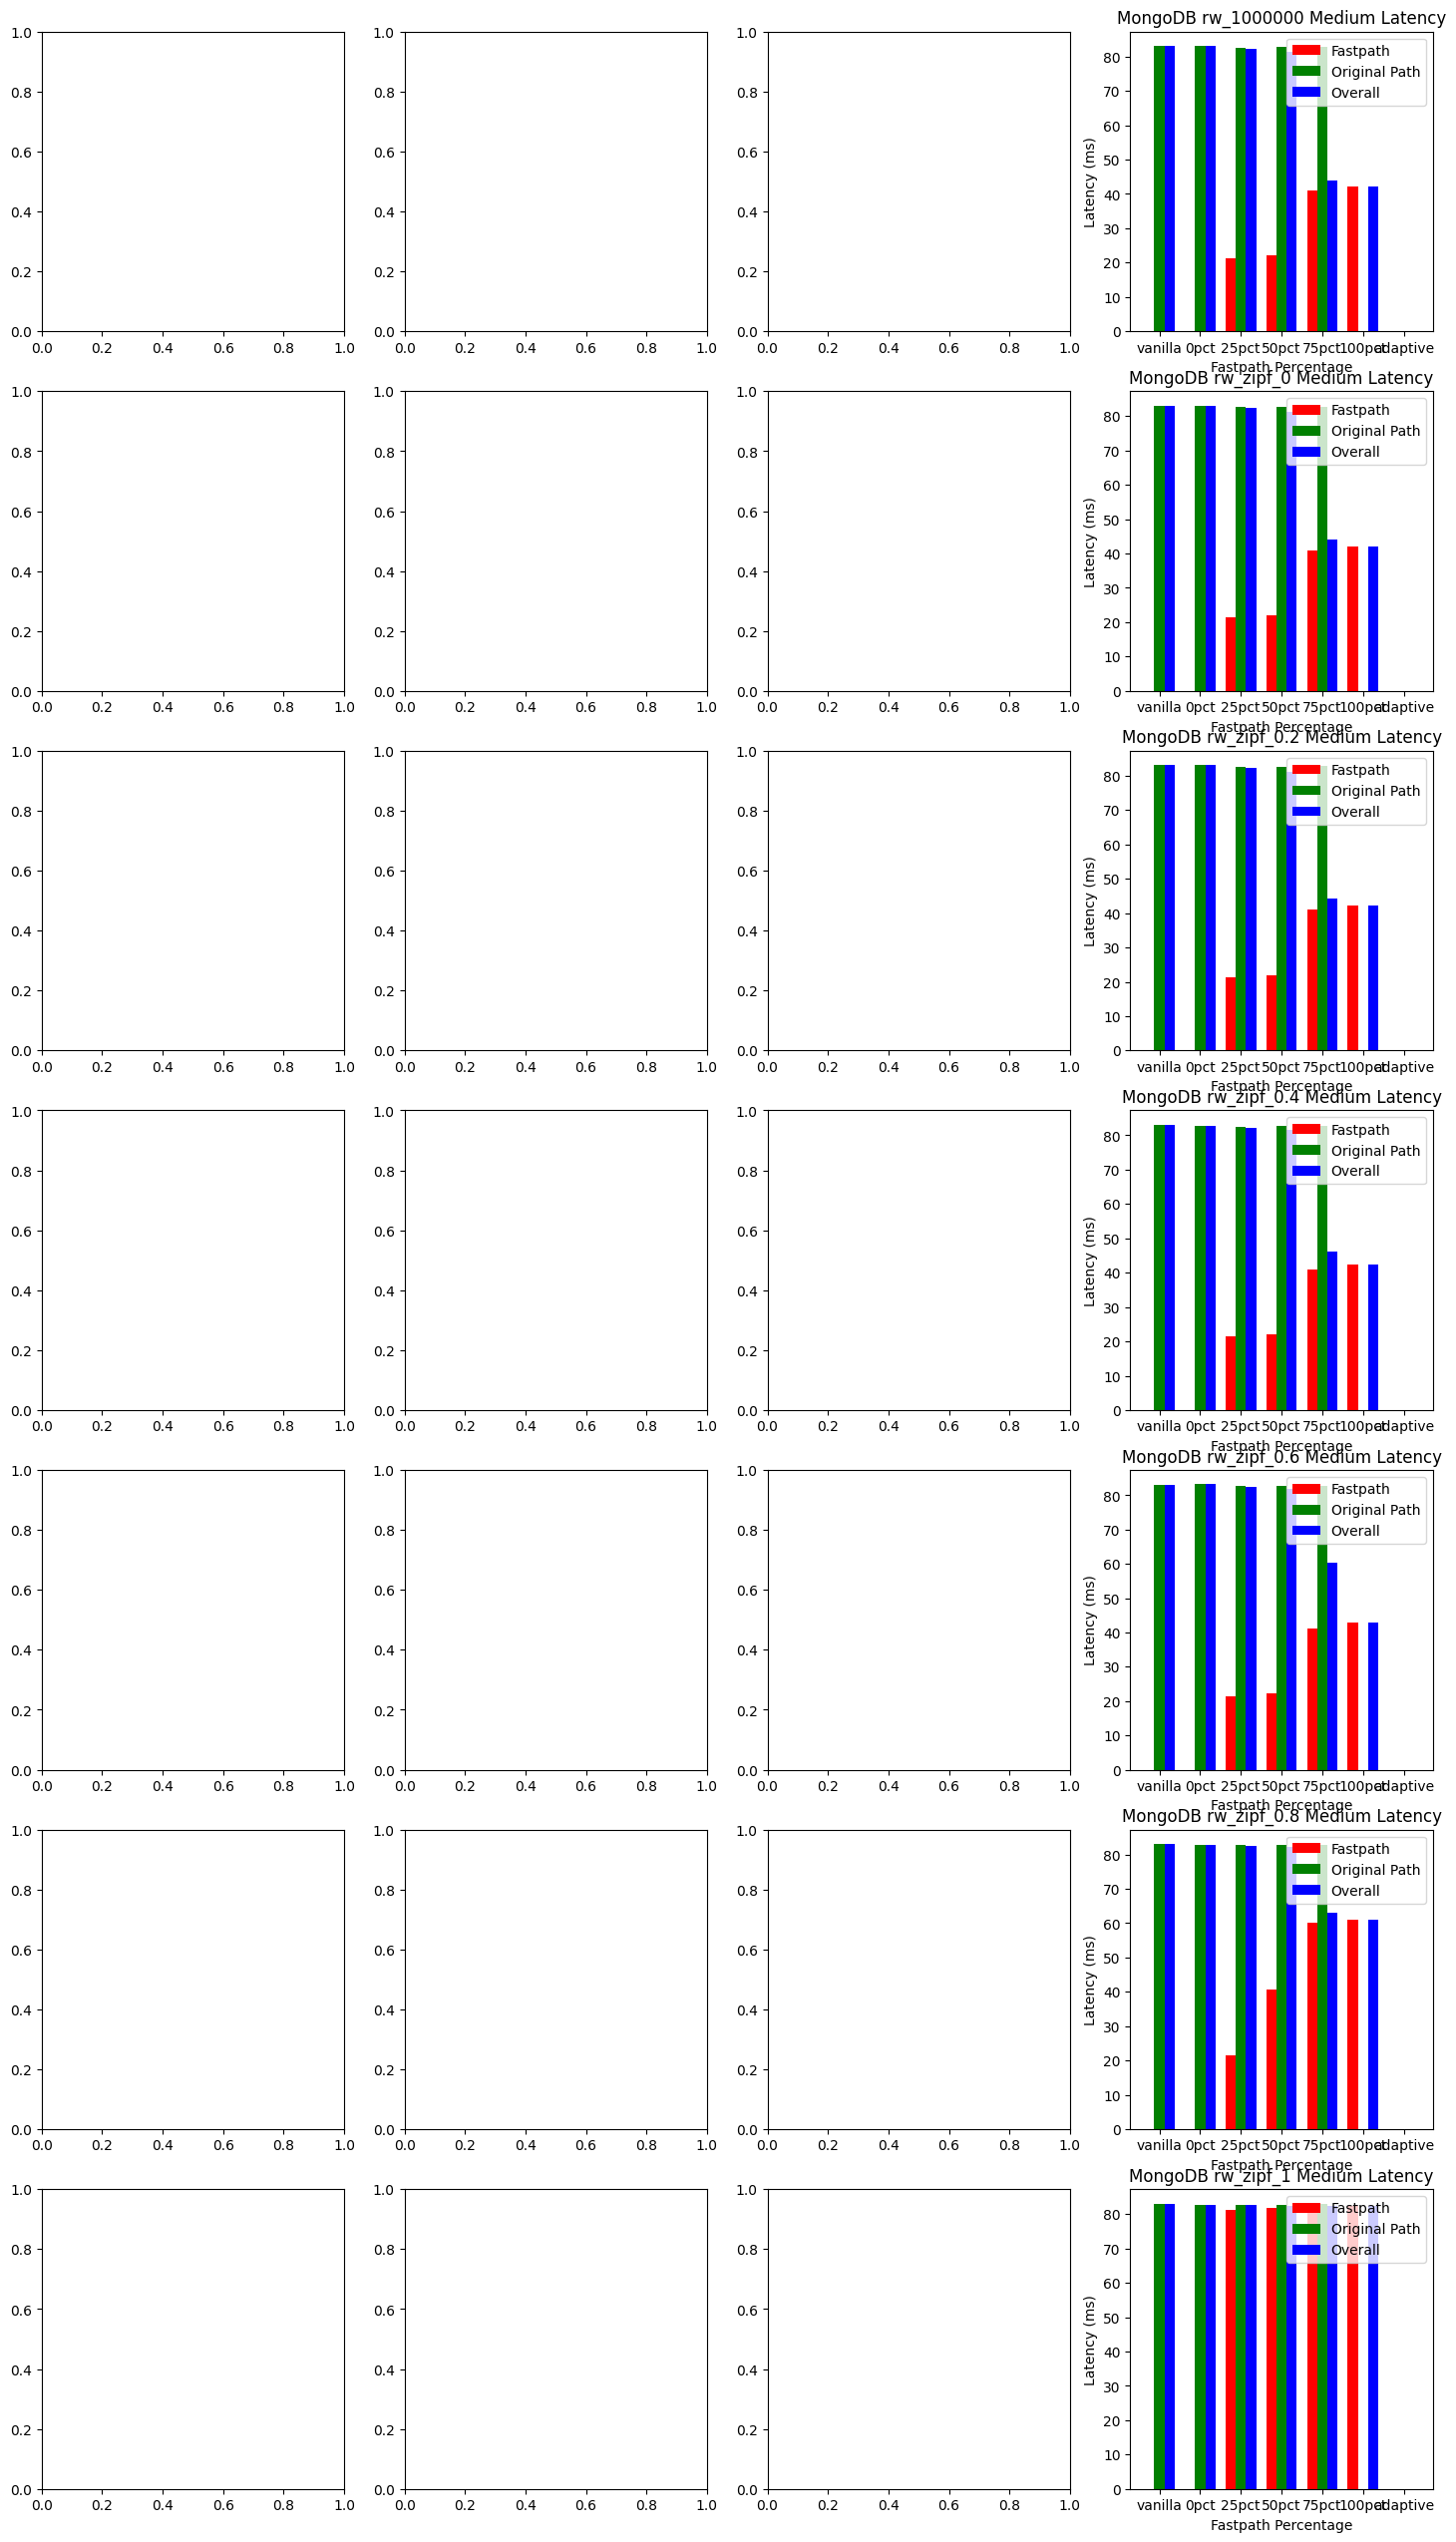

In [92]:
def draw_latency(axes, ylabels, data_pct, data_vanilla, title, ylabel_name):
    pct_2_id = {0: 1, 5: 2, 50: 3, 100: 4}
    
    categories = ["vanilla", "0pct", "25pct", "50pct", "75pct", "100pct", "adaptive"]
    l = [[0 for _ in range(len(categories))] for __ in range(3)]

    # for e in data_vanilla:
    #     if e["conc"] == fixed_conc_number:
    #         print(e)

    for e in data_vanilla:
        if e["conc"] == fixed_conc_number:
            for j, ylabel in enumerate(ylabels):
                l[j][0] = e[ylabel]
    for i, pct in enumerate(pct_modes):
        for e in data_pct[pct]:
            if e["conc"] == fixed_conc_number:
                for j, ylabel in enumerate(ylabels):
                    l[j][i+1] = e[ylabel]
    l = [[0 if x is None else x for x in sublist] for sublist in l]
    print(l)
    bar_width = 0.25
    axes.bar(np.arange(len(categories)) - bar_width, l[0], bar_width, label='Fastpath', color="red")
    axes.bar(np.arange(len(categories)),             l[1], bar_width, label='Original Path', color="green")
    axes.bar(np.arange(len(categories)) + bar_width, l[2], bar_width, label='Overall', color="blue")
    axes.set_title(title)
    axes.set_xlabel('Fastpath Percentage')
    axes.set_ylabel(ylabel_name)
    axes.set_xticks(np.arange(len(categories)), categories)
    axes.legend()

fig_latency, axes_latency = plt.subplots(nrows=len(workloads), ncols=4, figsize=(18, 32))

for i, workload in enumerate(workloads):
    # draw_latency(axes_latency[i][0], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], raft_jetpack[workload], raft_vanilla, 'Raft ' + workload + ' Medium Latency', 'Latency (ms)')
    # draw_latency(axes_latency[i][1], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], copilot_jetpack[workload], copilot_vanilla, 'Copilot ' + workload + ' Medium Latency', 'Latency (ms)')
    # draw_latency(axes_latency[i][2], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], mencius_jetpack[workload], mencius_vanilla, 'Mencius ' + workload + ' Medium Latency', 'Latency (ms)')
    draw_latency(axes_latency[i][3], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], mongodb_jetpack[workload], mongodb_vanilla, 'MongoDB ' + workload + ' Medium Latency', 'Latency (ms)')
    
# draw_latency(axes_latency[0], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], raft_jetpack, raft_vanilla, 'Raft-related Medium Latency', 'Latency (ms)')
# draw_latency(axes_latency[1], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], copilot_jetpack, copilot_vanilla, 'Copilot-related Medium Latency', 'Latency (ms)')
# draw_latency(axes_latency[2], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], mencius_jetpack, mencius_vanilla, 'Mencius-related Medium Latency', 'Latency (ms)')
# draw_latency(axes_latency[3], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], mongodb_jetpack, mongodb_vanilla, 'MongoDB-related Medium Latency', 'Latency (ms)')
# draw_latency(axes_latency[1][0], ["fastpath_ave", "original_protocol_ave", "latency_ave"], raft_pct, raft_vanilla, 'Raft-related Average Latency', 'Latency (ms)')
# draw_latency(axes_latency[1][1], ["fastpath_ave", "original_protocol_ave", "latency_ave"], copilot_pct, copilot_vanilla, 'Copilot-related Average Latency', 'Latency (ms)')
# draw_latency(axes_latency[1][2], ["fastpath_ave", "original_protocol_ave", "latency_ave"], mencius_pct, mencius_vanilla, 'Mencius-related Average Latency', 'Latency (ms)')

fig_latency.savefig("latency_pct.pdf", bbox_inches="tight")
fig_latency.show()

Different fastpath percentages


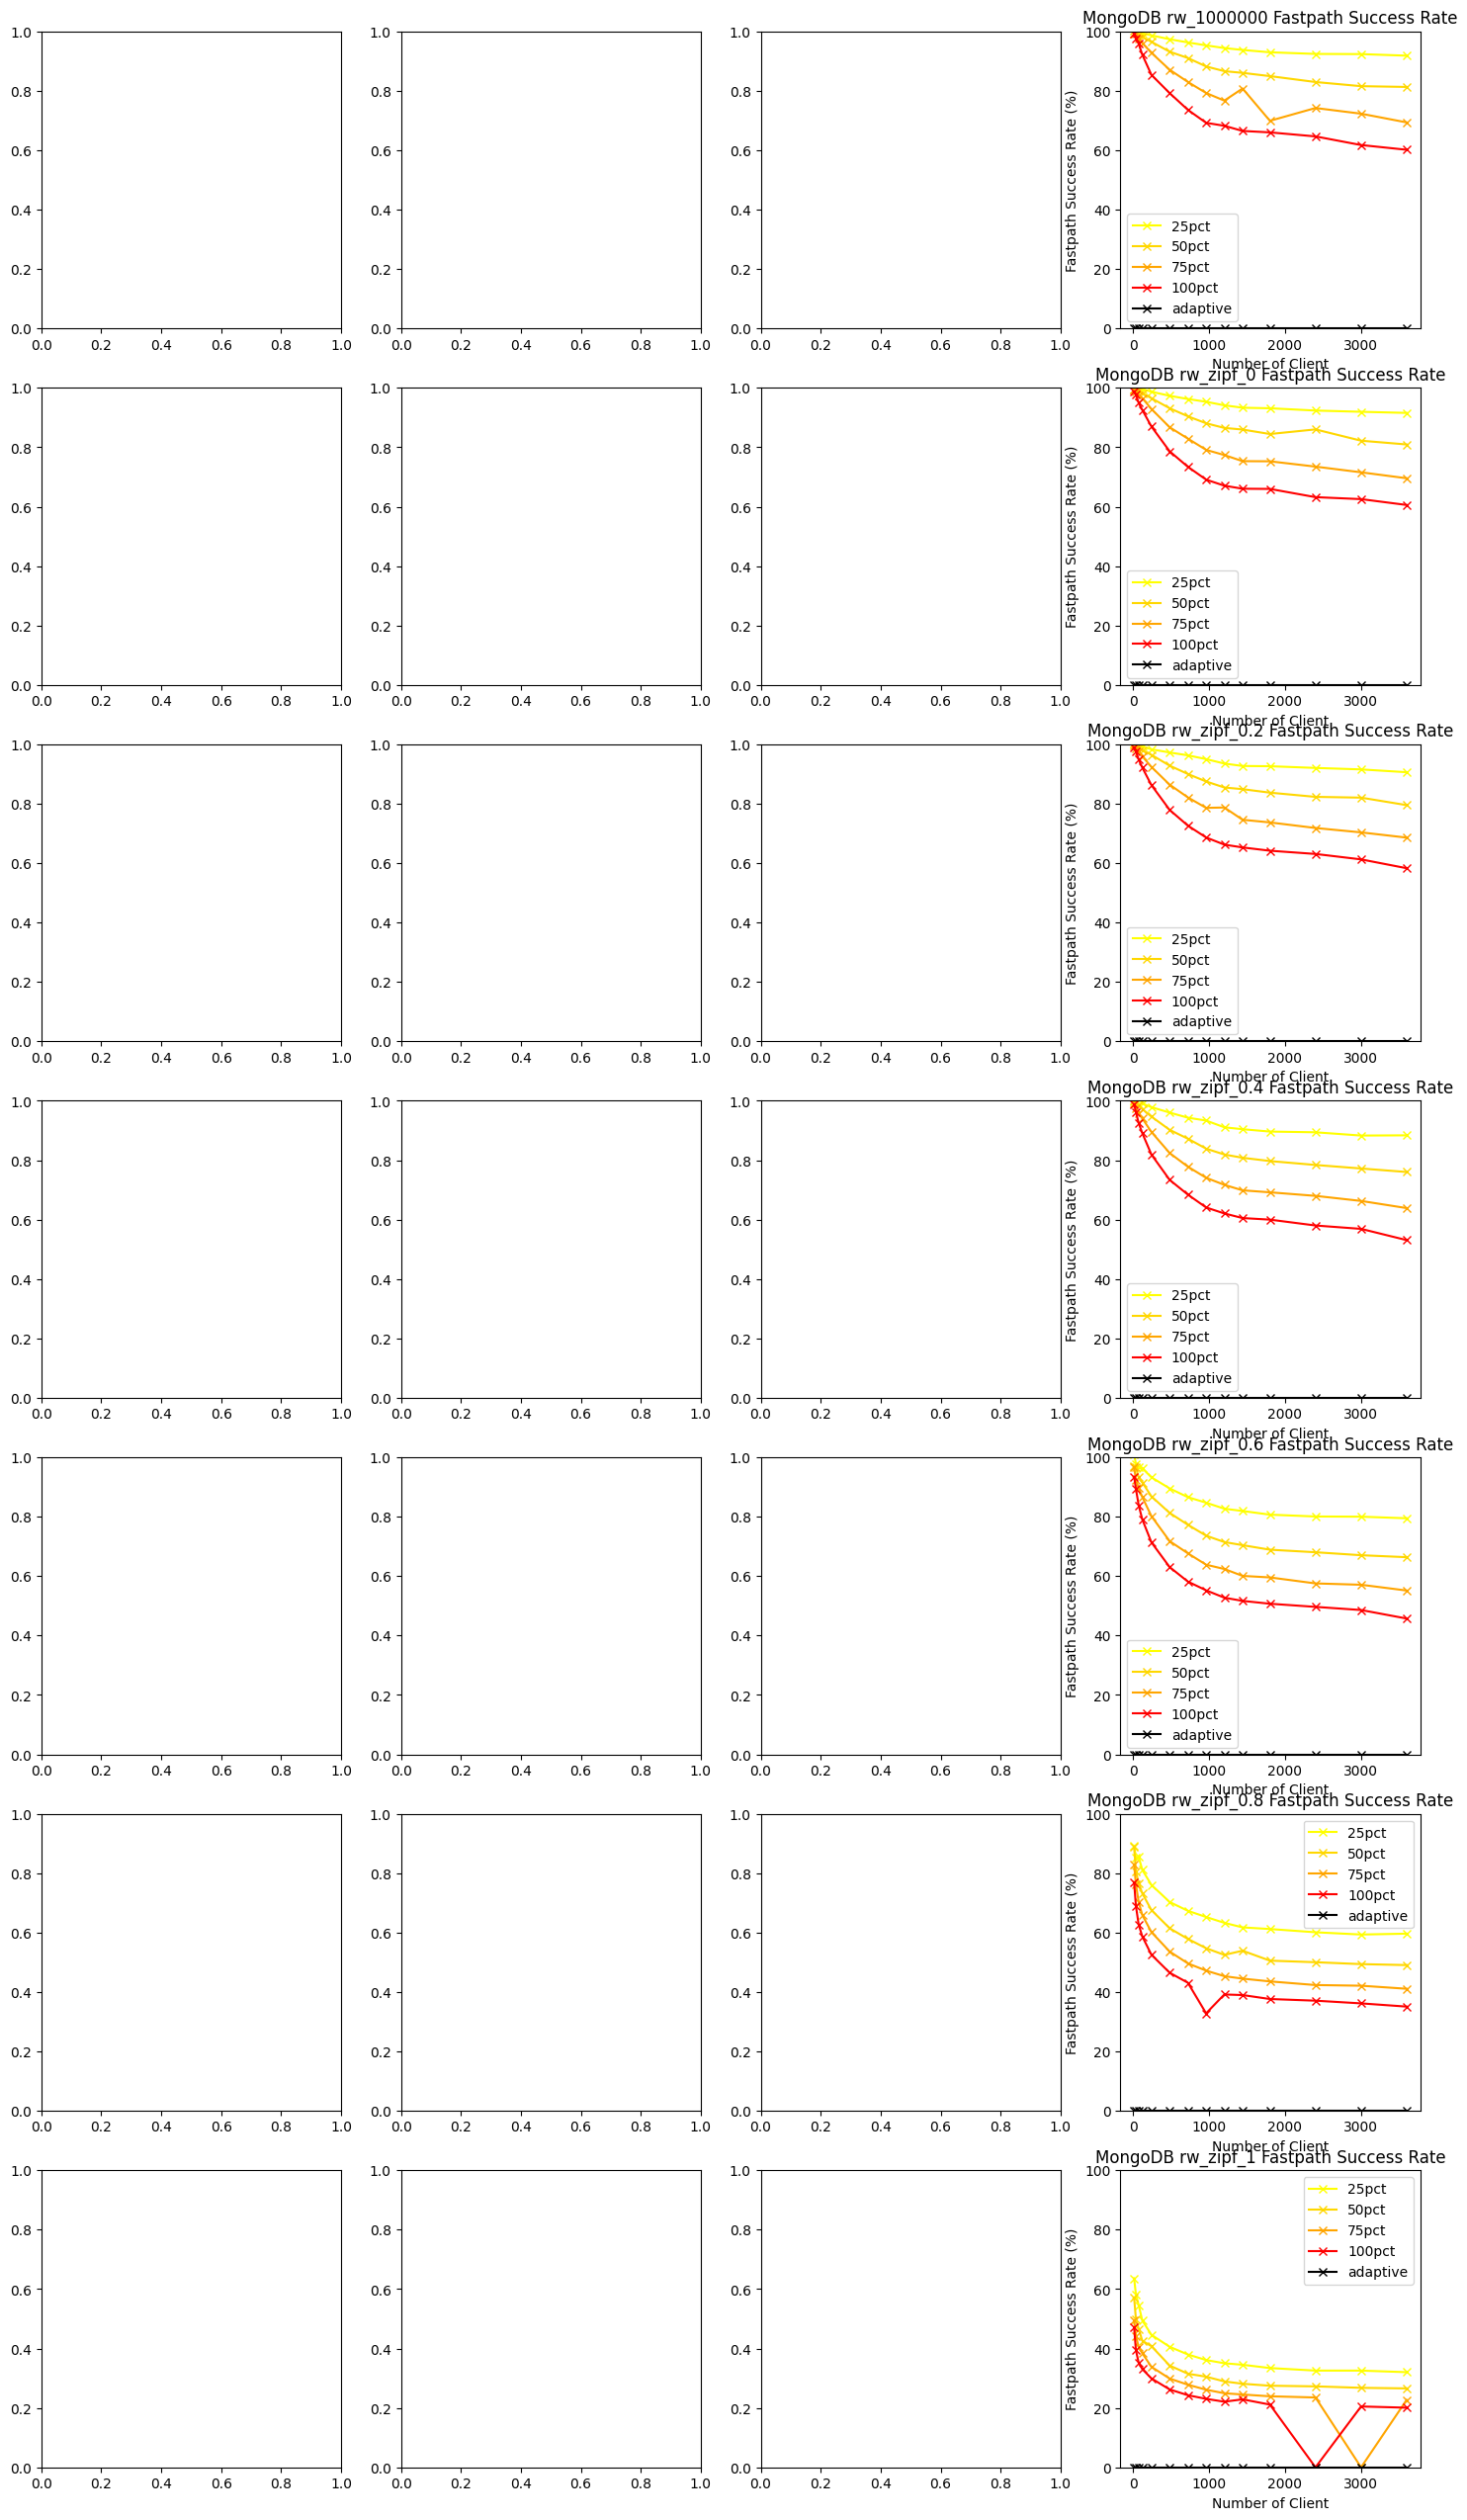

In [99]:
def draw_fastpath_success_rate(axes, data, modes, l_info, title):
    
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc] for __ in range(len(modes))]
    
    for i, mode in enumerate(modes):
        for e in data[mode]:
            l[i][conc_2_id[e["conc"]]] = e["fastpath_success_pct"]

    assert len(modes) == len(l_info)
    for i in range(len(modes)):
        # if (l[i][i] != 0):
        axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2])
        
    axes.set_title(title)
    axes.set_xlabel('Number of Client')
    axes.set_ylabel('Fastpath Success Rate (%)')
    axes.set_ylim(0, 100)
    axes.legend()

    min_rates = [100.0 for _ in range(len(modes))]
    for i in range(len(modes)):
        for j in range(len(conc)):
            min_rates[i] = min(l[i][j], min_rates[i])
    return min_rates

# Different fastpath percentages

print("Different fastpath percentages")

fig_fastpath_success_rate_pct, axes_fastpath_success_rate_pct = plt.subplots(nrows=len(workloads), ncols=4, figsize=(18, 32))

for i, workload in enumerate(workloads):
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][0], raft_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'Raft ' + workload + ' Fastpath Success Rate')
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][1], copilot_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'Copilot ' + workload + ' Fastpath Success Rate')
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][2], mencius_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'Mencius ' + workload + ' Fastpath Success Rate')
    draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][3], mongodb_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'MongoDB ' + workload + ' Fastpath Success Rate')
    

    # draw_latency(axes_latency[i][0], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], raft_jetpack[workload], raft_vanilla, 'Raft ' + workload + ' Medium Latency', 'Latency (ms)')
    # draw_latency(axes_latency[i][1], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], copilot_jetpack[workload], copilot_vanilla, 'Copilot ' + workload + ' Medium Latency', 'Latency (ms)')
    # draw_latency(axes_latency[i][2], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], mencius_jetpack[workload], mencius_vanilla, 'Mencius ' + workload + ' Medium Latency', 'Latency (ms)')
    # draw_latency(axes_latency[i][3], ["fastpath_50pct", "original_protocol_50pct", "latency50pct"], mongodb_jetpack[workload], mongodb_vanilla, 'MongoDB ' + workload + ' Medium Latency', 'Latency (ms)')


# draw_fastpath_success_rate(axes_fastpath_success_rate_pct[0], raft_pct, pct_modes[1:], pct_line_infos[1:], 'Raft-related Fastpath Success Rate')
# draw_fastpath_success_rate(axes_fastpath_success_rate_pct[1], copilot_pct, pct_modes[1:], pct_line_infos[1:], 'Copilot-related Fastpath Success Rate')
# draw_fastpath_success_rate(axes_fastpath_success_rate_pct[2], mencius_pct, pct_modes[1:], pct_line_infos[1:], 'Mencius-related Fastpath Success Rate')

# print(pct_modes[1:])
# print("Raft    Min Rates:", min_rates_raft)
# print("Copilot Min Rates:", min_rates_copilot)
# print("Mencius Min Rates:", min_rates_mencius)

fig_fastpath_success_rate_pct.savefig("fastpath_success_rate_pct.pdf", bbox_inches="tight")
fig_fastpath_success_rate_pct.show()

# # Different zipf alphas

# print("Different zipf alphas")

# fig_fastpath_success_rate_zipf, axes_fastpath_success_rate_zipf = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# min_rates_raft    = draw_fastpath_success_rate(axes_fastpath_success_rate_zipf[0], raft_zipf, zipf_modes, zipf_line_infos, 'Raft-related Fastpath Success Rate')
# min_rates_copilot = draw_fastpath_success_rate(axes_fastpath_success_rate_zipf[1], copilot_zipf, zipf_modes, zipf_line_infos, 'Copilot-related Fastpath Success Rate')
# min_rates_mencius = draw_fastpath_success_rate(axes_fastpath_success_rate_zipf[2], mencius_zipf, zipf_modes, zipf_line_infos, 'Mencius-related Fastpath Success Rate')

# print(zipf_modes)
# print("Raft    Min Rates:", min_rates_raft)
# print("Copilot Min Rates:", min_rates_copilot)
# print("Mencius Min Rates:", min_rates_mencius)

# fig_fastpath_success_rate_zipf.savefig("fastpath_success_rate_zipf.pdf", bbox_inches="tight")
# fig_fastpath_success_rate_zipf.show()

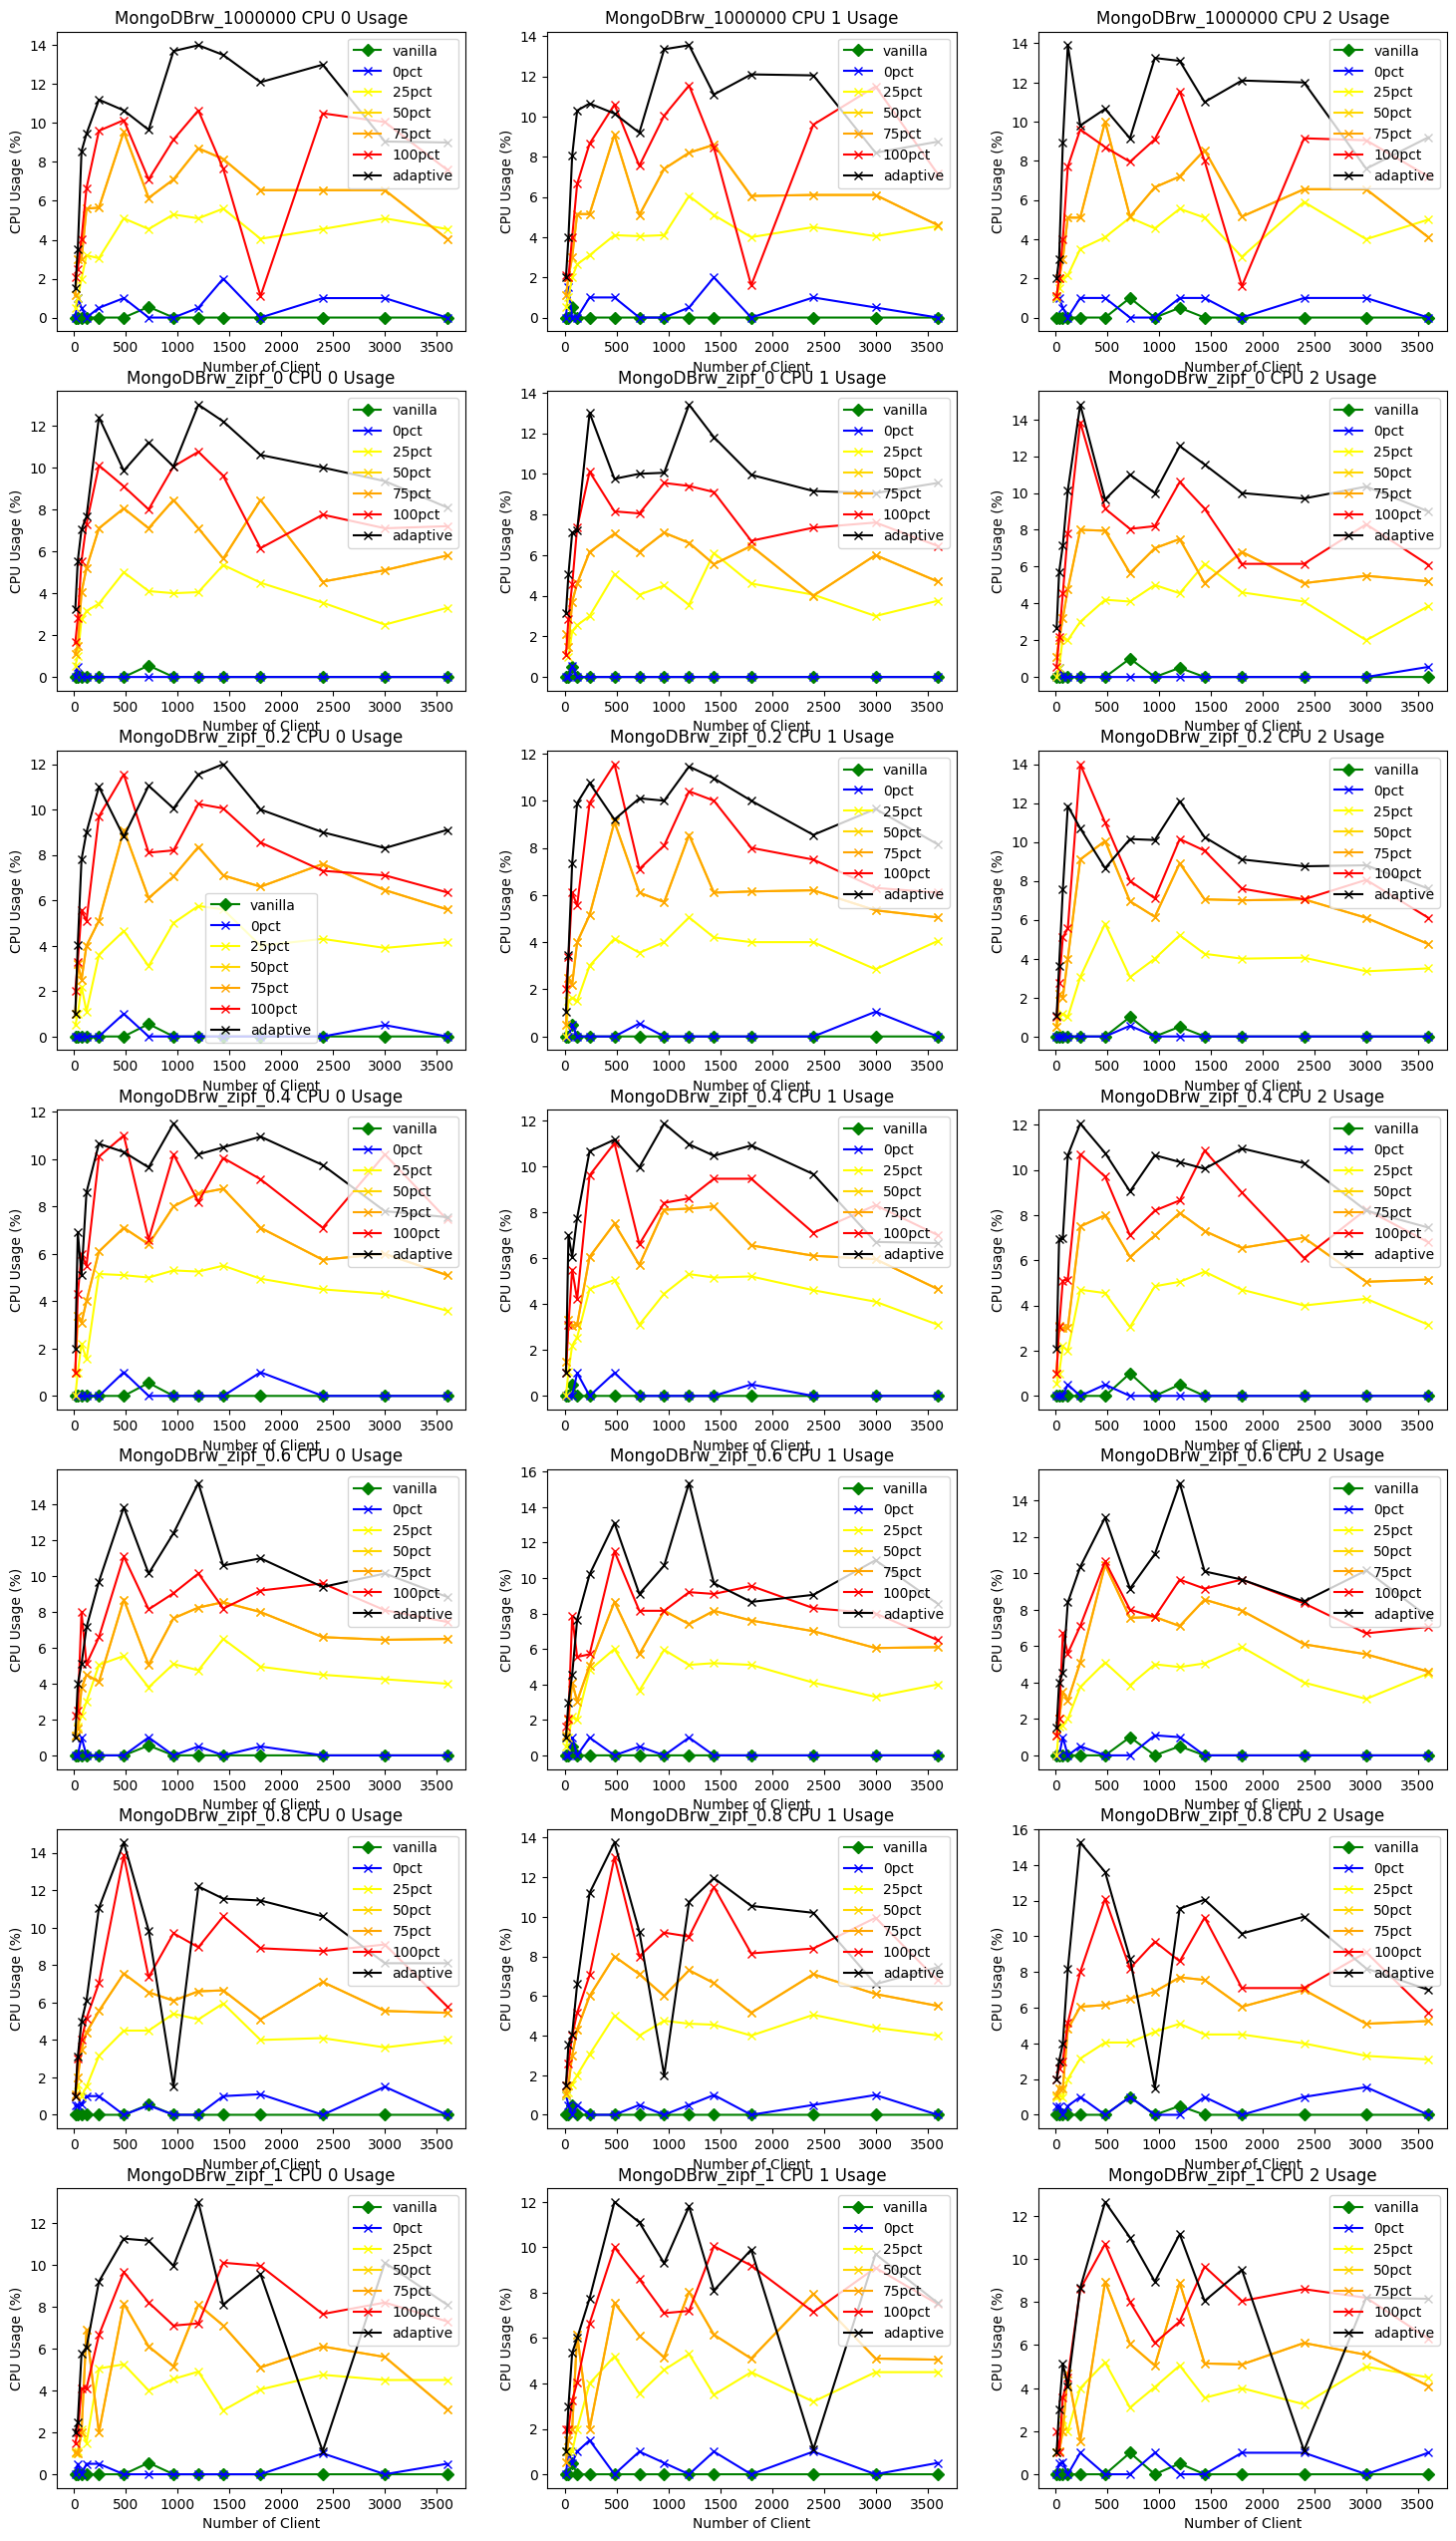

In [103]:
def draw_cpu_usage(axes, ylabel, data_pct, data_vanilla, title, ylabel_name):
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc] for __ in range(len(pct_modes)+1)]
    # l[0] = [data_vanilla[c] for c in conc]
    for e in data_vanilla:
        l[0][conc_2_id[e["conc"]]] = e[ylabel]
    for i, pct in enumerate(["0", "25", "50", "75", "100", "adaptive"]):
        for e in data_pct[pct]:
            l[i+1][conc_2_id[e["conc"]]] = e[ylabel]
    # for i in range(len(conc)):
    #     print(title, 12 * conc[i], ":", l[3][i])
    axes.plot(client, l[0], label='vanilla', color='green', marker='D')
    axes.plot(client, l[1], label='0pct', color='blue', marker='x')
    axes.plot(client, l[2], label='25pct', color='yellow', marker='x')
    axes.plot(client, l[3], label='50pct', color='gold', marker='x')
    axes.plot(client, l[3], label='75pct', color='orange', marker='x')
    axes.plot(client, l[4], label='100pct', color='red', marker='x')
    axes.plot(client, l[5], label='adaptive', color='black', marker='x')
    axes.set_title(title)
    axes.set_xlabel('Number of Client')
    axes.set_ylabel(ylabel_name)
    axes.legend()

fig_cpu_usage, axes_cpu_usage = plt.subplots(nrows=len(workloads), ncols=3, figsize=(18, 32))

for i, workload in enumerate(workloads):
    draw_cpu_usage(axes_cpu_usage[i][0], "cpu0_medium", mongodb_jetpack[workload], mongodb_vanilla, 'MongoDB' + workload + ' CPU 0 Usage', 'CPU Usage (%)')
    draw_cpu_usage(axes_cpu_usage[i][1], "cpu1_medium", mongodb_jetpack[workload], mongodb_vanilla, 'MongoDB' + workload + ' CPU 1 Usage', 'CPU Usage (%)')
    draw_cpu_usage(axes_cpu_usage[i][2], "cpu2_medium", mongodb_jetpack[workload], mongodb_vanilla, 'MongoDB' + workload + ' CPU 2 Usage', 'CPU Usage (%)')
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][0], raft_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'Raft ' + workload + ' Fastpath Success Rate')
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][1], copilot_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'Copilot ' + workload + ' Fastpath Success Rate')
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][2], mencius_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'Mencius ' + workload + ' Fastpath Success Rate')
    # draw_fastpath_success_rate(axes_fastpath_success_rate_pct[i][3], mongodb_jetpack[workload], pct_modes[1:], pct_line_infos[1:], 'MongoDB ' + workload + ' Fastpath Success Rate')
    



# fig_cpu_usage, axes_cpu_usage = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# draw_cpu_usage(axes_cpu_usage[0][0], "cpu0_medium", raft_pct, raft_vanilla,       'Raft-related CPU 0 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[0][1], "cpu0_medium", copilot_pct, copilot_vanilla, 'Copilot-related CPU 0 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[0][2], "cpu0_medium", mencius_pct, mencius_vanilla, 'Mencius-related CPU 0 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[1][0], "cpu1_medium", raft_pct, raft_vanilla,       'Raft-related CPU 1 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[1][1], "cpu1_medium", copilot_pct, copilot_vanilla, 'Copilot-related CPU 1 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[1][2], "cpu1_medium", mencius_pct, mencius_vanilla, 'Mencius-related CPU 1 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[2][0], "cpu2_medium", raft_pct, raft_vanilla,       'Raft-related CPU 2 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[2][1], "cpu2_medium", copilot_pct, copilot_vanilla, 'Copilot-related CPU 2 Usage', 'CPU Usage (%)')
# draw_cpu_usage(axes_cpu_usage[2][2], "cpu2_medium", mencius_pct, mencius_vanilla, 'Mencius-related CPU 2 Usage', 'CPU Usage (%)')


fig_cpu_usage.savefig("cpu_usage_pct.pdf", bbox_inches="tight")
fig_cpu_usage.show()

In [30]:
def find_turning_point_conc(ylabel, data_pct, data_vanilla):
    l = [[0 for _ in conc] for __ in range(2)]
    
    for e in data_vanilla:
        l[0][conc_2_id[e["conc"]]] = e[ylabel]
        
    for e in data_pct["100"]:
        l[1][conc_2_id[e["conc"]]] = e[ylabel]
        
    for i in range(len(l[0])):
        if l[1][i] < l[0][i]:
            return conc[i - 1], conc[i]

    return -1, -1


def find_turning_point_config(ylabel, data_pct, data_vanilla, conc_num):
    fastpath_config = -1
    for e in data_pct["100"]:
        if e["conc"] == conc_num:
            fastpath_config = e[ylabel]
            
    vanilla_config = -1
    for e in data_vanilla:
        if e["conc"] == conc_num:
            vanilla_config = e[ylabel]
            
    return fastpath_config, vanilla_config

tp_conc_raft_0, tp_conc_raft_1 = find_turning_point_conc("mid_throughput", raft_pct, raft_vanilla)
tp_conc_copilot_0, tp_conc_copilot_1 = find_turning_point_conc("mid_throughput", copilot_pct, copilot_vanilla)
tp_conc_mencius_0, tp_conc_mencius_1 = find_turning_point_conc("mid_throughput", mencius_pct, mencius_vanilla)

tp_data = [
    ("Raft before turning", raft_pct, raft_vanilla, tp_conc_raft_0),
    ("Raft after turning", raft_pct, raft_vanilla, tp_conc_raft_1),
    ("Copilot before turning", copilot_pct, copilot_vanilla, tp_conc_copilot_0),
    ("Copilot after turning", copilot_pct, copilot_vanilla, tp_conc_copilot_1),
    ("Mencius before turning", mencius_pct, mencius_vanilla, tp_conc_mencius_0),
    ("Mencius after turning", mencius_pct, mencius_vanilla, tp_conc_mencius_1),
]

for protocol, data, vanilla_data, tp_conc in tp_data:
    tp_fastpath_success_rate, tp_vanilla_success_rate = find_turning_point_config("fastpath_success_pct", data, vanilla_data, tp_conc)
    tp_fastpath_cpu0,         tp_vanilla_cpu0         = find_turning_point_config("cpu0_medium",          data, vanilla_data, tp_conc)
    tp_fastpath_cpu1,         tp_vanilla_cpu1         = find_turning_point_config("cpu1_medium",          data, vanilla_data, tp_conc)
    tp_fastpath_cpu2,         tp_vanilla_cpu2         = find_turning_point_config("cpu2_medium",          data, vanilla_data, tp_conc)
    print(protocol, "turning point:", "conc 12 *", tp_conc, "=", 12 * tp_conc, ", fastpath_success_pct:", tp_fastpath_success_rate, \
          ", cpu:", tp_fastpath_cpu0, tp_fastpath_cpu1, tp_fastpath_cpu2, ", ave cpu: ", (tp_fastpath_cpu0 + tp_fastpath_cpu1 + tp_fastpath_cpu2) / 3)
    


Raft before turning turning point: conc 12 * 150 = 1800 , fastpath_success_pct: 98.96270750317174 , cpu: 100.0 64.05 63.9 , ave cpu:  75.98333333333333
Raft after turning turning point: conc 12 * 200 = 2400 , fastpath_success_pct: 97.65627329562962 , cpu: 100.0 60.85 61.15 , ave cpu:  74.0
Copilot before turning turning point: conc 12 * -1 = -12 , fastpath_success_pct: -1 , cpu: -1 -1 -1 , ave cpu:  -1.0
Copilot after turning turning point: conc 12 * -1 = -12 , fastpath_success_pct: -1 , cpu: -1 -1 -1 , ave cpu:  -1.0
Mencius before turning turning point: conc 12 * 80 = 960 , fastpath_success_pct: 99.84086684171314 , cpu: 96.0 96.5 96.0 , ave cpu:  96.16666666666667
Mencius after turning turning point: conc 12 * 100 = 1200 , fastpath_success_pct: 99.74827831868915 , cpu: 95.05 95.95 96.0 , ave cpu:  95.66666666666667


In [ ]:
# Below are old things
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------

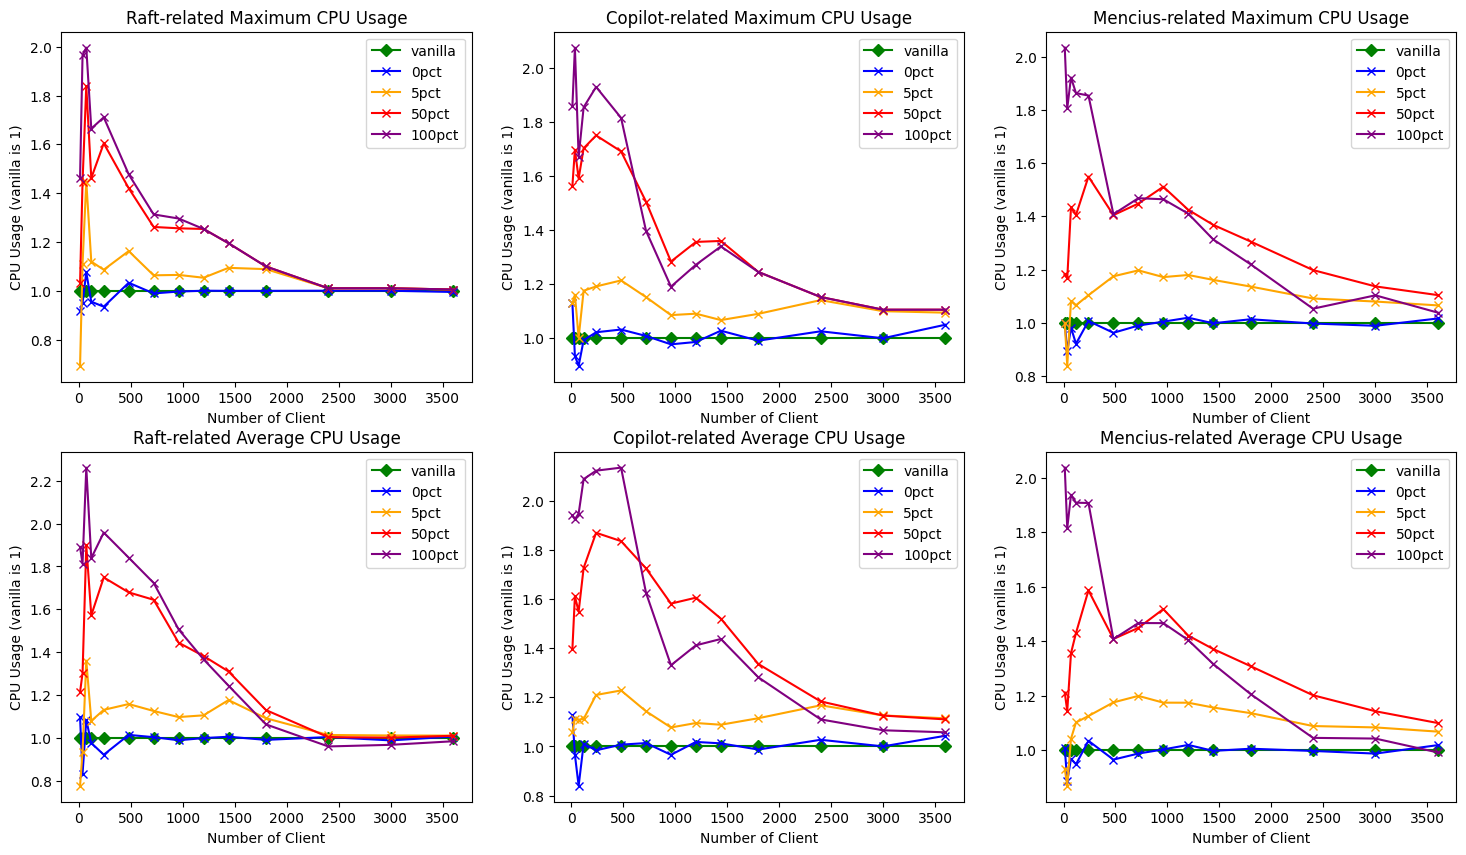

In [144]:
def draw_cpu_usage_pct(axes, ylabel, data_pct, data_vanilla, title, ylabel_name):
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc] for __ in range(5)]
    # l[0] = [data_vanilla[c] for c in conc]
    for e in data_vanilla:
        l[0][conc_2_id[e["conc"]]] = e[ylabel]
    for i, pct in enumerate(["0", "5", "50", "100"]):
        for e in data_pct[pct]:
            l[i+1][conc_2_id[e["conc"]]] = e[ylabel]
    for i in range(1, 5):
        for j in range(len(conc)):
            l[i][j] /= l[0][j]
    for j in range(len(conc)):
        l[0][j] /= l[0][j]
    axes.plot(client, l[0], label='vanilla', color='green', marker='D')
    axes.plot(client, l[1], label='0pct', color='blue', marker='x')
    axes.plot(client, l[2], label='5pct', color='orange', marker='x')
    axes.plot(client, l[3], label='50pct', color='red', marker='x')
    axes.plot(client, l[4], label='100pct', color='purple', marker='x')
    axes.set_title(title)
    axes.set_xlabel('Number of Client')
    axes.set_ylabel(ylabel_name)
    axes.legend()

fig_cpu_usage_pct, axes_cpu_usage_pct = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

draw_cpu_usage_pct(axes_cpu_usage_pct[0][0], "cpu_max", raft_pct, raft_vanilla, 'Raft-related Maximum CPU Usage', 'CPU Usage (vanilla is 1)')
draw_cpu_usage_pct(axes_cpu_usage_pct[0][1], "cpu_max", copilot_pct, copilot_vanilla, 'Copilot-related Maximum CPU Usage', 'CPU Usage (vanilla is 1)')
draw_cpu_usage_pct(axes_cpu_usage_pct[0][2], "cpu_max", mencius_pct, mencius_vanilla, 'Mencius-related Maximum CPU Usage', 'CPU Usage (vanilla is 1)')
draw_cpu_usage_pct(axes_cpu_usage_pct[1][0], "cpu_ave", raft_pct, raft_vanilla, 'Raft-related Average CPU Usage', 'CPU Usage (vanilla is 1)')
draw_cpu_usage_pct(axes_cpu_usage_pct[1][1], "cpu_ave", copilot_pct, copilot_vanilla, 'Copilot-related Average CPU Usage', 'CPU Usage (vanilla is 1)')
draw_cpu_usage_pct(axes_cpu_usage_pct[1][2], "cpu_ave", mencius_pct, mencius_vanilla, 'Mencius-related Average CPU Usage', 'CPU Usage (vanilla is 1)')

fig_cpu_usage_pct.savefig("jetpack_cpu_usage_pct.pdf", bbox_inches="tight")
fig_cpu_usage_pct.show()

In [87]:
paxos_overhead = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "paxos_plus" and e["fastpath_mode"] == "0"], key=lambda x: x["conc"])
paxos_fastpath = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "paxos_plus" and e["fastpath_mode"] == "adapative"], key=lambda x: x["conc"])
paxos_vanilla = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "none_paxos"], key=lambda x: x["conc"])
print(len(paxos_overhead), len(paxos_fastpath), len(paxos_vanilla))

raft_overhead = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "fpga_raft_plus" and e["fastpath_mode"] == "0"], key=lambda x: x["conc"])
raft_fastpath = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "fpga_raft_plus" and e["fastpath_mode"] == "adapative"], key=lambda x: x["conc"])
raft_vanilla = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "none_fpga_raft"], key=lambda x: x["conc"])
print(len(raft_overhead), len(raft_fastpath), len(raft_vanilla))

copilot_overhead = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "copilot_plus" and e["fastpath_mode"] == "0"], key=lambda x: x["conc"])
copilot_fastpath = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "copilot_plus" and e["fastpath_mode"] == "adapative"], key=lambda x: x["conc"])
copilot_vanilla = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "none_copilot"], key=lambda x: x["conc"])
print(len(copilot_overhead), len(copilot_fastpath), len(copilot_vanilla))

mencius_overhead = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "mencius_plus" and e["fastpath_mode"] == "0"], key=lambda x: x["conc"])
mencius_fastpath = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "mencius_plus" and e["fastpath_mode"] == "adapative"], key=lambda x: x["conc"])
mencius_vanilla = sorted([e for e in dicts if e["workload"] == "rw_1000000" and e["mode"] == "none_mencius"], key=lambda x: x["conc"])
print(len(mencius_overhead), len(mencius_fastpath), len(mencius_vanilla))

conc = [e["conc"] for e in copilot_vanilla]
conc_2_id = {}
for (i, c) in enumerate(conc):
    conc_2_id[c] = i
print(conc)
print(conc_2_id)

14 14 14
14 14 14
14 14 14
14 14 14
[1, 3, 6, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]
{1: 0, 3: 1, 6: 2, 10: 3, 20: 4, 40: 5, 60: 6, 80: 7, 100: 8, 120: 9, 150: 10, 200: 11, 250: 12, 300: 13}


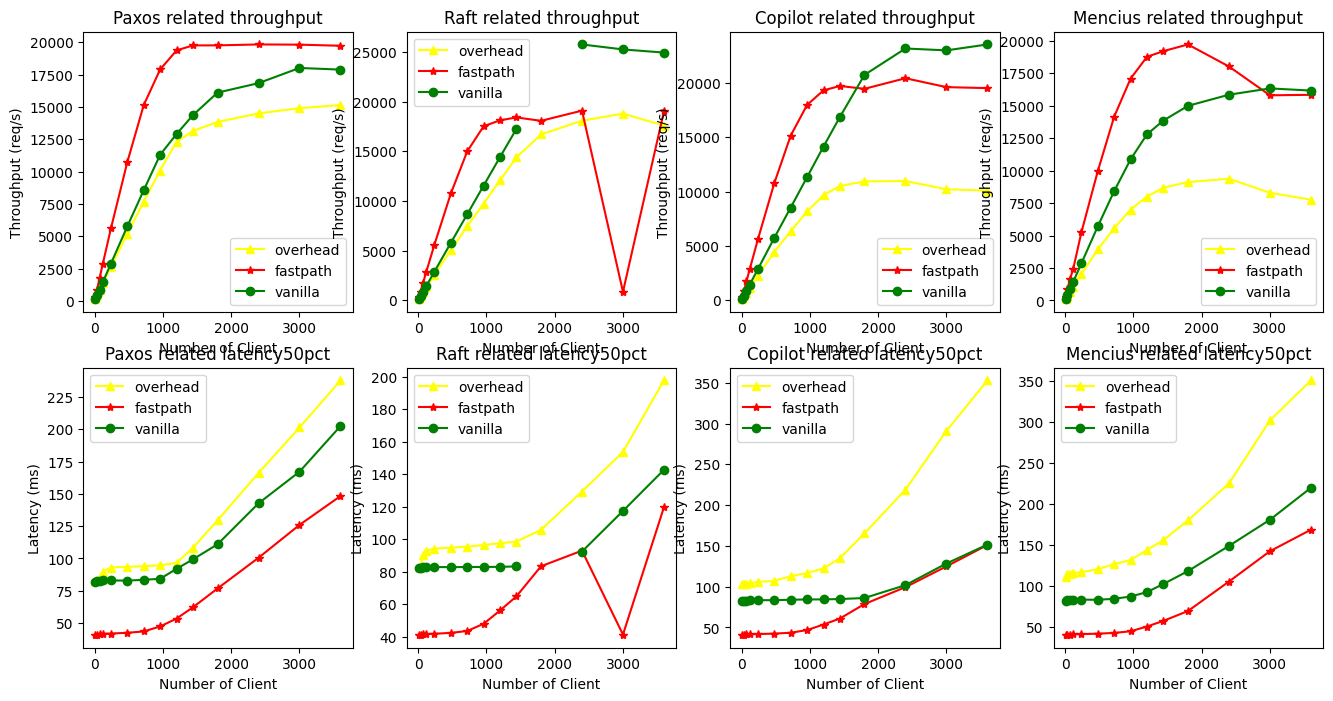

In [89]:
def draw_performance(axes, ylabel, data_list, title, ylabel_name):
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc], [0 for _ in conc], [0 for _ in conc]]
    for i in range(3):
        for e in data_list[i]:
            l[i][conc_2_id[e["conc"]]] = e[ylabel]
    # for i in range(3):
    #     for j in range(len(conc)):
    #         if l[i][j] == 0:
    #             if j == 0:
    #                 l[i][j] = l[i][j + 1] / conc[j + 1] * conc[j]
    #             elif j == len(conc) - 1:
    #                 l[i][j] = l[i][j - 1] / conc[j - 1] * conc[j]
    #             else:
    #                 l[i][j] = (l[i][j + 1] / conc[j + 1] + l[i][j - 1] / conc[j - 1]) / 2 * conc[j]
    axes.plot(client, l[0], label='overhead', color='yellow', marker='^')
    axes.plot(client, l[1], label='fastpath', color='red', marker='*')
    axes.plot(client, l[2], label='vanilla', color='green', marker='o')
    axes.set_title(title)
    axes.set_xlabel('Number of Client')
    axes.set_ylabel(ylabel_name)
    axes.legend()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

draw_performance(axes[0][0], "mid_throughput", [paxos_overhead, paxos_fastpath, paxos_vanilla], 'Paxos related throughput', 'Throughput (req/s)')
draw_performance(axes[0][1], "mid_throughput", [raft_overhead, raft_fastpath, raft_vanilla], 'Raft related throughput', 'Throughput (req/s)')
draw_performance(axes[0][2], "mid_throughput", [copilot_overhead, copilot_fastpath, copilot_vanilla], 'Copilot related throughput', 'Throughput (req/s)')
draw_performance(axes[0][3], "mid_throughput", [mencius_overhead, mencius_fastpath, mencius_vanilla], 'Mencius related throughput', 'Throughput (req/s)')
draw_performance(axes[1][0], "latency50pct", [paxos_overhead, paxos_fastpath, paxos_vanilla], 'Paxos related latency50pct', 'Latency (ms)')
draw_performance(axes[1][1], "latency50pct", [raft_overhead, raft_fastpath, raft_vanilla], 'Raft related latency50pct', 'Latency (ms)')
draw_performance(axes[1][2], "latency50pct", [copilot_overhead, copilot_fastpath, copilot_vanilla], 'Copilot related latency50pct', 'Latency (ms)')
draw_performance(axes[1][3], "latency50pct", [mencius_overhead, mencius_fastpath, mencius_vanilla], 'Mencius related latency50pct', 'Latency (ms)')

# axes[1].plot(client, [e["mid_throughput"] for e in raft_overhead], label='overhead', color='yellow', marker='^')
# axes[1].plot(client, [e["mid_throughput"] for e in raft_fastpath], label='fastpath', color='red', marker='*')
# axes[1].plot(client, [e["mid_throughput"] for e in raft_vanilla], label='vanilla', color='green', marker='o')
# axes[1].set_title('Raft related throughput')
# axes[1].set_xlabel('Number of Client')
# axes[1].set_ylabel('Throughput (req/s)')
# axes[1].legend()

fig.savefig("performance.pdf")
fig.show()